# Table of Content <a class="anchor" id="table_of_content"></a>

* [I. Titanic Disaster](#chapter_1)
    * [1. Chronologgy of Catastrophe](#section_1_1)
    * [1. Disproportionate Devastation](#section_1_2)
* [II. Data Preprocessing](#chapter_2)
    * [1. Obtaining Data](#section_2_1)
    * [2. Data Cleaning](#section_2_2)
    * [3. Statistic Summary](#section_2_3)
    * [4. Missing Values & Duplicates](#section_2_4)
    * [5. Feature Engineering](#section_2_5)
        * [Title Extraction](#section_2_5_1)
        * [Ticket Frequency Encoding](#section_2_5_2)
        * [Parch & SibSp Synthesis](#section_2_5_3)
        * [FamilySize & Ticket Frequency Synthesis](#section_2_5_4)
        * [Fare Transformation](#section_2_5_5)
    * [6. Handling Missing Data](#section_2_6)
        * [Age Missing Values](#section_2_6_1)
        * [Embarked Missing Values](#section_2_6_2)
        * [Cabin Missing Values](#section_2_6_3)
        * [Fare Missing Values](#section_2_6_4)
    * [7. Feature Engineering](#section_2_7)
        * [Title & Pclass Synthesis](#section_2_7_1)
        * [Pfare Extraction](#section_2_7_2)
        
Load packages :

In [1]:
import pandas as pd # Collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import numpy as np # Foundational package for scientific computing
import scipy.stats as ss # Collection of functions for scientific computing and advance mathematics
import sklearn # Collection of machine learning algorithms

# Visualization
import seaborn as sns
import matplotlib
import matplotlib.lines as lines
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
%matplotlib inline
import matplotlib.gridspec as grid_spec
from matplotlib.ticker import FuncFormatter
import matplotlib.patheffects as pe
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import requests, io
import sidetable

!python --version
print(f'Seaborn {sns.__version__}\nMatplotlib {mpl.__version__}\nPandas {pd.__version__}\nNumpy {np.__version__}')

Python 3.10.4
Seaborn 0.11.2
Matplotlib 3.5.1
Pandas 1.4.3
Numpy 1.22.3


Palette for data visualization :

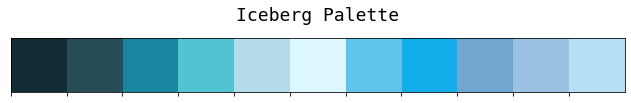

In [2]:
sns.palplot(["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9', '#DCF7FE', '#60C4EB', '#13ADEB', '#71A6D1', '#9BC1E3', '#B6DFF6'])
plt.title("Iceberg Palette", loc = 'center', fontfamily = 'monospace', fontsize = 18, y = 1.2);

For adding `.png` images to the graph :

In [3]:
def offset_png(x, y, path, ax, zoom, offset) : 
    img = plt.imread(io.BytesIO(path), format = 'JPG')
    im = OffsetImage(img, zoom = zoom)
    im.image.axes = ax
    x_offset = offset
    ab = AnnotationBbox(im, (x, y), xybox = (x_offset, 0), frameon = False, xycoords = 'data', boxcoords = "offset points", pad = 0)
    ax.add_artist(ab)

# I. Titanic Disaster <a class="anchor" id="chapter_1"></a>
[Table of Content](#table_of_content)

Before starting work, let's explore the disastrous sinking of the R.M.S Titanic.

## 1. Chronology of Catastrophe <a class="anchor" id="section_1_1"></a>

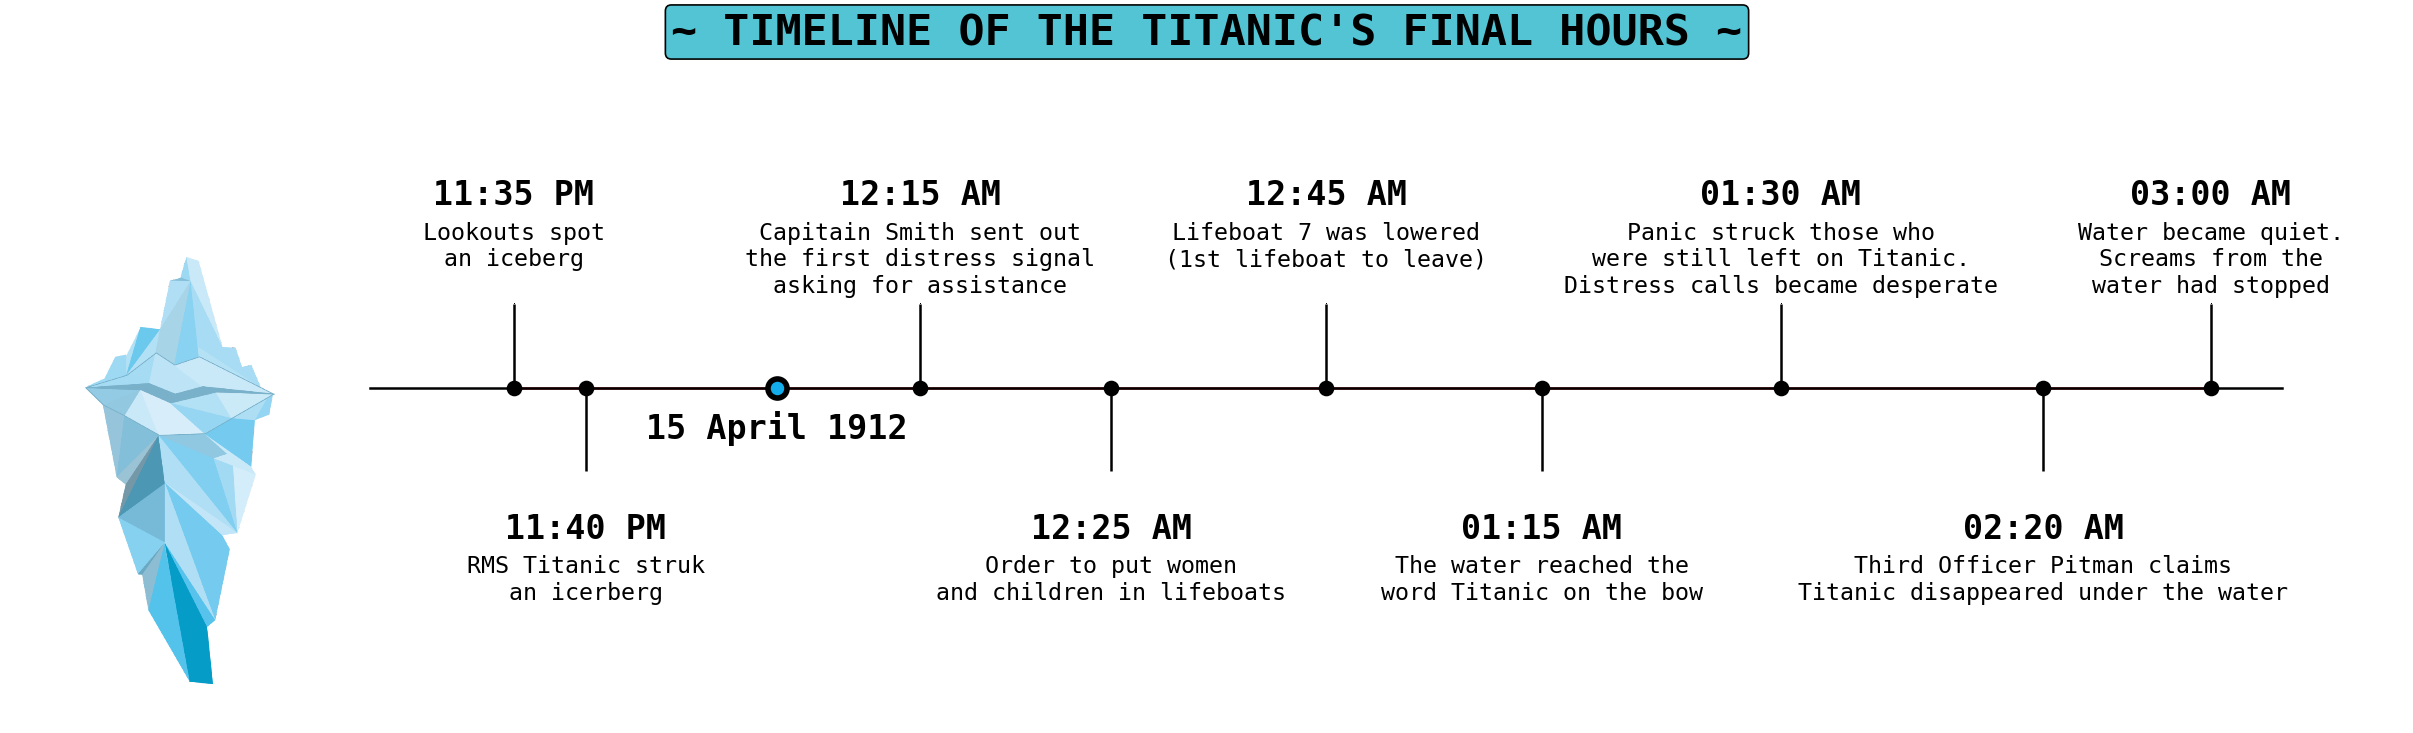

In [4]:
def timeline() :
    tl_dates = ["15 April 1912"]
    tl_x = [3.2]

    tl_sub_x = [2.1, 2.4, 3.8, 4.6, 5.5, 6.4, 7.4, 8.5, 9.2]
    tl_sub_times = ["11:35 PM", "11:40 PM", "12:15 AM", "12:25 AM", "12:45 AM", "01:15 AM", "01:30 AM", "02:20 AM", "03:00 AM"]

    tl_text = ["Lookouts spot\nan iceberg",
               "RMS Titanic struk\nan icerberg",
               "Capitain Smith sent out\nthe first distress signal\nasking for assistance", 
               "Order to put women\nand children in lifeboats",
               "Lifeboat 7 was lowered\n(1st lifeboat to leave)",
               "The water reached the\nword Titanic on the bow",
               "Panic struck those who\nwere still left on Titanic.\nDistress calls became desperate",
               "Third Officer Pitman claims\nTitanic disappeared under the water",
               "Water became quiet.\nScreams from the\nwater had stopped"]

    # Set figure & Axes
    fig, ax = plt.subplots(figsize = (20, 6), 
                           constrained_layout = True, 
                           dpi = 120,
                           facecolor = 'white')
    ax.set_facecolor('white')
    ax.set_ylim(-2, 2)
    ax.set_xlim(0, 10)


    # Timeline : line
    ax.axhline(0, xmin = 0.15, xmax = 0.95, c = 'black', zorder = 1)
    # Timeline : Date Points
    ax.scatter(tl_x, np.zeros(len(tl_x)), s = 190, c = 'black', zorder = 2)
    ax.scatter(tl_x, np.zeros(len(tl_x)), s = 50, c = '#13ADEB', zorder = 3)
    # Timeline : Time Points
    ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s = 70, c = 'black', zorder = 4)

    # Date Text
    for x, date in zip(tl_x, tl_dates):
        ax.text(x, - 0.30, 
                date, 
                ha = 'center', 
                fontfamily = 'monospace', 
                fontweight = 'bold',
                fontsize = 20,
                color = 'black')
    
    # Stemplot : vertical line
    levels = np.zeros(len(tl_sub_x))    
    levels[::2] = 0.5
    levels[1::2] = -0.5
    markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection = True)    
    plt.setp(baseline, zorder = 0)
    plt.setp(markerline, marker = ',', color = 'black')
    plt.setp(stemline, color = 'black')

    # Text
    for idx, x, time, txt in zip(range(1, len(tl_sub_x) + 1), tl_sub_x, tl_sub_times, tl_text):
        ax.text(x, 2 * (idx%2) - 0.9, 
                time, 
                ha = 'center', 
                fontfamily = 'monospace', 
                fontweight = 'bold',
                fontsize = 20,
                color = 'black')
    
        ax.text(x, 2 * (idx % 2) - 1, 
                txt,
                va = 'top', 
                ha = 'center', 
                fontfamily = 'monospace', 
                fontsize = 14,
                color = 'black')

    # Spine
    for spine in ["left", "top", "right", "bottom"] :
        ax.spines[spine].set_visible(False)

    # Ticks    
    ax.set_xticks([]) 
    ax.set_yticks([])

    # Title
    ax.set_title("~ TIMELINE OF THE TITANIC'S FINAL HOURS ~", 
                 fontweight = "bold", 
                 fontfamily = 'monospace', 
                 fontsize = 26, 
                 color = 'black',
                 bbox = dict(boxstyle = 'round', 
                             facecolor = '#51C4D3', 
                             alpha = 0.99, 
                             pad = 0.14, 
                             edgecolor = 'black'));
    # Picture
    url ='https://user-images.githubusercontent.com/73826011/179183883-0729951a-e9cb-4c05-9ecd-ca6757931496.png'
    response = requests.get(url).content
    offset_png(x = 0.7, y = -0.5, path = response, ax = ax, zoom = 0.25, offset = 0)
    
timeline()

## 2. Disproportionate Devastation <a class="anchor" id="section_1_2"></a>
[Table of Content](#table_of_content)

**Differential Effects of the Disaster :**

   - Differential effects are present in all disasters, and the Titanic was not exempt from its share of disproportionate burdens imposed on certain groups of people. Socio-economic status, for example, plays a key role in the outcome of many disasters, including the Titanic. Since everyone onboard the Titanic was physically in the same location, the nature of differential effects was different than other disasters where certain people are able to escape the catastrophe. This is not to say, however, that differential effects did not exist, but rather that they prevailed in terms of the chances of survival through access to information and proximity to lifeboats, and even in the collection of bodies in the aftermath. This had implications most obviously in survival rates, but also in terms of social norms and movements in the Titanic’s wake.

**Information and Lifeboat Access :**

   - Socio-economic status on the Titanic created critical boundaries between first, second and third class passengers. In terms of the physical space occupied by each class of passenger, first and second class cabins were much closer to the boat deck (where the lifeboats were located) than third class passengers. The first and second class cabins were mainly separated by purely social barriers, while physical doors separated the third class quarters from other parts of the ship. In addition, the closing of the watertight doors altered the emergency exits in 3rd class, creating new labyrinthine corridors, compared to the very straight design of the first class corridors This obviously makes it easier for first and second class passengers to get to the lifeboats, as time is of the essence on a sinking ship. However, access to lifeboats is not the only type of access that favours the upper classes. Access to information was widely dispersed, with first class passengers at an advantage in that they had more connections with crew members and could access information through these connections.

**Social Norms :**

   - Rather than spatial location and access to information, the differential outcomes in terms of gender and age could be widely attributed to the social norms that were strictly followed on the night of the Titanic disaster, all the way through its very last moments. In situations of life and death, a widespread social norm is that the safety of women and children should be prioritized. On the Titanic, Captain Smith gave specific *["Women & Children First"](https://en.wikipedia.org/wiki/Women_and_children_first)* orders to the first and second officers (each of whom was responsible for filling lifeboats). Officer Lightoller, on the port side of the ship, took this order to mean women and children only, resulting in lifeboats being lowered prior to reaching full capacity. On the starboard side of the ship, Officer Murdoch interpreted the orders as they were stated, meaning that men were offered seats on lifeboats so long as there were no women and children waiting to board. In either case, established social norms that defined women and children as vulnerable, weak, and in need of protection were honored by most men even when faced with imminent death. Thus, the pervasiveness of these norms was a driving factor behind the disproportionate number of deaths suffered across age and gender.<br>
   >Note. — Very informative [article](https://www.pnas.org/doi/full/10.1073/pnas.1207156109) which demonstrates that *"Women & Children First"* is the exception and not the rule in maritime disasters.

# II. Data Preprocessing <a class="anchor" id="chapter_2"></a>

[Table of Content](#table_of_content)

## 1. Obtaining Data <a class="anchor" id="section_2_1"></a>

The Titanic competition was hosted in late 2012. It involved predicting whether passengers on the Titanic would survive or not... given a set of characteristics like their age, Sex, class of travel, port Embarked etc.
The data set consists of a training data file and a test data file in CSV form. The files are very small. The aspiring scientist, which I am, is supposed to make his model 'learn' from the training data set (which contain an additional column on whether the passenger survived or not)and apply these 'learnings' to the test data set and predict which of the passengers in the test dataset survives.

Load the Datasets :

In [5]:
df_train, df_test = pd.read_csv('https://github.com/MelvinBridault/Titanic/raw/main/CSV/train.csv'), pd.read_csv('https://github.com/MelvinBridault/Titanic/raw/main/CSV/test.csv')

- Training set *(train.csv)* :<br>
There are 12 columns for each of the 891 passengers. One of them is the `Survived` flag. Our ML algorithms are supposed to learn from this `df_train` and then predict the `Survived` column for the `df_test` which does NOT contain this column. Notice that 3 of these 11 columns in `df_train` have missing data for `Age`, `Cabin` & `Embarked`.

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Test set *(test.csv)* :<br>
So we see that test data has 418 rows. It does NOT contain the `Survived` column. We have to predict this after we learn from the `df_train`. It has the remaining 11 columns and notice that here too `Age`, `Cabin` and `Fare` have missing data.

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
# Returns combined dataframe of training and test set
combined = pd.concat([df_train, df_test])
print(f'Combined dataset : {combined.shape[0]} rows & {combined.shape[1]} columns')

# Let's name our dataframes !
df_train.name, df_test.name, combined.name = 'df_train', 'df_test', 'combined'

Combined dataset : 1309 rows & 12 columns


Now let's go through the features and describe a little :


| **Feature Name** | **Description**                        | **Data Type**           | **Key**                                           | **Used in Model ?** |
|------------------|----------------------------------------|-------------------------|---------------------------------------------------|------|
| `Name`           | Passenger Name                         | Nominal         |                                                   | ❌ |
| `Ticket`         | Ticket Number                          | Nominal         |                                                   | ❌ |
| `Cabin`          | Cabin Number                           | Nominal         |                                                   | ❌ |
| `Embarked`       | Port of Embarkation                    | Nominal         |C - Cherbourg<br>Q - Queenstown<br>S - Southampton | ❌ |
| `Sex`            | Male or Female                         | Nominal         |                                                   | ❌ |
| `Pclass`         | Proxy for socio-economic statut        | Ordinal       |1 - Upper<br>2 - Middle<br>3 - Lower               | ✅ |
| `Passenger ID`   | Unique identifing # for each passenger | Discrete      |                                                   | ❌ |
| `SibSp`          | # of Siblings or Spouses               | Discrete      |                                                   | ❌ |
| `Parch`          | # of Parents or Children               | Discrete    |                                                   | ❌ |
| `Survived`       | Target variable                        | Discrete    |0 - No<br>1 - Yes                                  | ❌ |
| `Age`            | Passenger Age                          | Continuous  |                                                   | ✅ |
| `Fare`           | Passenger Fare                         | Continuous  |                                                   | ✅ |


**SPECIAL NOTES :**

- Fare is in Pre-1970 British Pounds (£) :
    - Conversion Factors : 1£ = 12s = 240d and 1s = 20d


- Age is in Years :
    - Fractional if Age less than One (1)
    - If the Age is Estimated, it is in the form xx.5


- With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored. The following are the definitions used for sibsp and parch :
    - Sibling : Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
    - Spouse : Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
    - Parent : Mother or Father of Passenger Aboard Titanic
    - Child : Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws. Some children travelled only with a nanny, therefore parch = 0 for them.

As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

## 2. Data Cleaning <a class="anchor" id="section_2_2"></a>
[Table of Content](#table_of_content)

After doing some research it would appear that the [Kaggle](https://www.kaggle.com/c/titanic/data) datasets are derived almost certainly from the titanic3.csv file.<br>
There is a description of the dataset provided in the accompanying information file which also discusses its origins. According to this file, these datasets reflected the state of data available as of **2 August 1999**.<br>
Comparing this file with the union of train.csv and test.csv reveals they are identical.

In short, the datasets have not been updated since 1999 and the inconsistencies makes the data invalid and confusing when it comes to factual or historical value.

[Encyclopedia Titanica](https://www.encyclopedia-titanica.org/) data seems to be regarded as the most definitive source for information about the Titanic passengers, but the data is not free.

It bothered me to work with incorrect data so I took the liberty of updating the data, by doing this, I exclude myself from the Kaggle competition. 😞

In [9]:
# Compilation of errors we have noticed :

for df in [df_train, df_test, combined] :
    # Age 
    df.loc[df['PassengerId'] == 631, 'Age'] = 47 # 80, actually used age at death
    df.loc[df['PassengerId'] == 117, 'Age'] = 66 # 70
    df.loc[df['PassengerId'] == 546, 'Age'] = 59 # 64
    df.loc[df['PassengerId'] == 988, 'Age'] = 25 # 76, actually used age at death
    df.loc[df['PassengerId'] == 223, 'Age'] = 41 # 51
    df.loc[df['PassengerId'] == 264, 'Age'] = 45 # 40
    df.loc[df['PassengerId'] == 1229, 'Age'] = 15 # 39
    df.loc[df['PassengerId'] == 1031, 'Age'] = 42 # 40
    df.loc[df['PassengerId'] == 799, 'Age'] = 45 # 30
    df.loc[df['PassengerId'] == 697, 'Age'] = 19 # 44
    df.loc[df['PassengerId'] == 290, ['Age', 'Name']] = [23, 'Connolly, Miss. Catherine "Kate"' ] # 22 & duplicates name
    df.loc[df['PassengerId'] == 898, 'Age'] = 41 # 30
    df.loc[df['PassengerId'] == 892, 'Age'] = 44 # 34
    df.loc[df['PassengerId'] == 684, 'Age'] = 12 # 14.5
    df.loc[df['PassengerId'] == 112, 'Age'] = 16 # 14.5
    df.loc[df['PassengerId'] == 10, 'Age'] = 17 # 14
    df.loc[df['PassengerId'] == 23, 'Age'] = 17 # 15
    df.loc[df['PassengerId'] == 675, 'Age'] = 18 # 30
    df.loc[df['PassengerId'] == 784, 'Age'] = 35 # NaN
    df.loc[df['PassengerId'] == 129, 'Age'] = 2 # NaN
    df.loc[df['PassengerId'] == 534, 'Age'] = 23 # NaN
    df.loc[df['PassengerId'] == 271, 'Age'] = 28 # 42
    df.loc[df['PassengerId'] == 1228, 'Age'] = 40 # 32
    df.loc[df['PassengerId'] == 781, 'Age'] = 17 # 12

    # Ford family
    df.loc[df['PassengerId'] == 87, ['Age', 'Parch', 'SibSp']] = [14, 1, 3] # 16, 3, 1
    df.loc[df['PassengerId'] == 148, ['Age', 'Parch', 'SibSp']] = [7, 1, 3] # 9, 2, 2
    df.loc[df['PassengerId'] == 737, ['Age', 'Parch']] = [54, 4] # 48, 3
    df.loc[df['PassengerId'] == 437, ['Age', 'Parch', 'SibSp']] = [20, 1, 3] # 21, 2, 2
    df.loc[df['PassengerId'] == 1059, ['Parch', 'SibSp']] = [1, 3] # 2, 2

    # Abbott family
    df.loc[df['PassengerId'] == 280, ['Age', 'Parch', 'SibSp']] = [39, 2, 0] # 35, 1, 1
    df.loc[df['PassengerId'] == 1284, ['Parch', 'SibSp']] = [1, 1] # 2, 0

    # Fare errors
    df.loc[df['PassengerId'] == 452	, ['Fare', 'Age']] = [6.19, 28] # 19, 26
    df.loc[df['PassengerId'] == 491, ['Fare', 'Age']] = [6.19, 19] # 19, 26

    # I found some children with this function : df[(df.Title == 'Miss') & (df.Parch != 0) & (df.Ticket_frequency > 1) & (df.Age.isnull())]
    df.loc[df['PassengerId'] == 129, 'Age'] = 2 # NaN
    df.loc[df['PassengerId'] == 230, 'Age'] = 12 # NaN
    df.loc[df['PassengerId'] == 410, 'Age'] = 3 # NaN
    df.loc[df['PassengerId'] == 486, 'Age'] = 8 # NaN
    df.loc[df['PassengerId'] == 889, 'Age'] = 7 # NaN

    # Guarantee group (PassengerId) : 1158, 807, 733, 675, 634, 482, 467, 414, 278
    df.loc[df['PassengerId'] == 278, 'Age'] = 21 # 30 Guarantee group
    df.loc[df['PassengerId'] == 414, 'Age'] = 21 # 30 Guarantee group
    df.loc[df['PassengerId'] == 467, 'Age'] = 20 # 30 Guarantee group
    df.loc[df['PassengerId'] == 482, 'Age'] = 38 # 30 Guarantee group
    df.loc[df['PassengerId'] == 634, 'Age'] = 29 # 42 Guarantee group
    df.loc[df['PassengerId'] == 733, 'Age'] = 42 # 30 Guarantee group
    
    # Seaman (PassenerId) : 1044, 1015, 598, 303, 272, 180
    df.loc[df['PassengerId'] == 180, 'Ticket'] = 370160 # LINE Seaman
    df.loc[df['PassengerId'] == 272, 'Ticket'] = 370160 # LINE Seaman
    df.loc[df['PassengerId'] == 303, 'Ticket'] = 370160 # LINE Seaman
    df.loc[df['PassengerId'] == 598, 'Ticket'] = 370160 # LINE Seaman
    df.loc[df['PassengerId'] == 1015, ['Age', 'Ticket', 'Fare']] = [27, 370160, 0] # 28, 392095, 7.5 Seaman
    df.loc[df['PassengerId'] == 1044, 'Ticket'] = 370160 # 3701 Seaman
    
    # Passengers who travelled for free (PassenerId): 1264, 873, 823, 816, 264
    df.loc[df['PassengerId'] == 873, 'Fare'] = 0 # Seaman, back to New York 
    df.loc[df['PassengerId'] == 816, 'Age'] = 39 # 42 Personal valet to Joseph Bruce Ismay
    
    # Parch & SibSp errors
    df.loc[df['PassengerId'] == 69, ['Parch', 'SibSp']] = [0, 0] # 2 & 4
    df.loc[df['PassengerId'] == 1106, ['Parch', 'SibSp']] = [0, 0] # 2 & 4
    df.loc[df['PassengerId'] == 424, 'SibSp'] = 2 # 1 (Husband & Sister)
    df.loc[df['PassengerId'] == 611, 'SibSp'] = 2 # 1 (Husband & Sister)
    df.loc[df['PassengerId'] == 15, ['Parch', 'SibSp']] = [1, 2] # 0, 0, Child who travelled with his aunt
    df.loc[df['PassengerId'] == 1045, 'Parch'] = 3 # 2
    df.loc[df['PassengerId'] == 1155, 'SibSp'] = 2 # 1
    df.loc[df['PassengerId'] == 176, 'SibSp'] = 2 # 1
    df.loc[df['PassengerId'] == 897, 'Parch'] = 1 # 0

    # Samaan family
    df.loc[df['PassengerId'] == 1189, ['Age', 'Parch', 'SibSp']] = [40, 3, 0] # NaN, 0, 2
    df.loc[df['PassengerId'] == 49, ['Age', 'Parch', 'SibSp']] = [16, 1, 2] # NaN, 0, 2
    df.loc[df['PassengerId'] == 921, ['Age', 'Parch', 'SibSp']] = [17, 1, 2] # NaN, 0, 2
    df.loc[df['PassengerId'] == 1231, ['Age', 'Parch', 'SibSp']] = [10, 1, 2] # NaN, 0, 0, Child who travelled with his uncle & cousins

    # Sage family 
    df.loc[df['PassengerId'] == 160, 'Age'] = 5 # NaN
    df.loc[df['PassengerId'] == 181, 'Age'] = 7 # NaN
    df.loc[df['PassengerId'] == 202, 'Age'] = 16 # NaN
    df.loc[df['PassengerId'] == 325, 'Age'] = 19 # NaN
    df.loc[df['PassengerId'] == 793, 'Age'] = 20 # NaN
    df.loc[df['PassengerId'] == 847, 'Age'] = 18 # NaN
    df.loc[df['PassengerId'] == 864, 'Age'] = 14 # NaN
    df.loc[df['PassengerId'] == 1080, 'Age'] = 10 # NaN
    df.loc[df['PassengerId'] == 1234, 'Age'] = 44 # NaN
    df.loc[df['PassengerId'] == 1252, 'Age'] = 12 # 14.5
    df.loc[df['PassengerId'] == 1257, 'Age'] = 44 # NaN

    # Bourke family
    df.loc[df['PassengerId'] == 189, ['Age', 'Parch', 'SibSp']] = [42, 0, 2] # 40, 1, 1
    df.loc[df['PassengerId'] == 594, ['Age', 'Parch', 'SibSp']] = [40, 0, 2]  # NaN, 2, 0
    df.loc[df['PassengerId'] == 658, ['Parch', 'SibSp']] = [0, 2] # 1, 1

    # Ticket
    df.loc[df['PassengerId'] == 1079, ['Ticket', 'Fare']] = ['48871', 32.2] # A/4 48873 
    df.loc[df['PassengerId'] == 566, ['Ticket', 'Fare']] = ['48871', 32.2] # A/4 48871
    df.loc[df['PassengerId'] == 812, ['Ticket', 'Fare']] = ['48871', 32.2] # A/4 48871
    df.loc[df['PassengerId'] == 901, ['Ticket', 'Fare']] = ['48871', 32.2] # A/4 48871

## 3. Statistic Summary <a class="anchor" id="section_2_3"></a>
[Table of Content](#table_of_content)

Which all of these columns do you think would be useful for predicting Survival ? Let us explore !

Only NUMERIC data :
- Surprisingly, survival rate of the passengers is ~38% (mean `Survived`), which is the same result than the actual survival rate, whereas there are 418 lines missing in the test set
- More than half of the passengers were travelling in the 3rd class (~54%)
- Most of the passengers were under 30 years old
- `Fare` = 0 needs investigation

In [10]:
# Generate descriptive statistics
df_train.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,741.000000,891.000000,891.00000,891.000000
mean,446.000000,0.383838,2.308642,29.301174,0.531987,0.37486,32.185742
std,257.353842,0.486592,0.836071,14.403683,1.110642,0.80084,49.707230
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.00000,0.000000
25%,223.500000,0.000000,2.000000,20.000000,0.000000,0.00000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.00000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.00000,31.275000
max,891.000000,1.000000,3.000000,74.000000,8.000000,6.00000,512.329200


In [11]:
df_train.stb.freq(['Pclass'], style = True)

,Pclass,count,percent,cumulative_count,cumulative_percent
0,3,491,55.11%,491,55.11%
1,1,216,24.24%,707,79.35%
2,2,184,20.65%,891,100.00%


Only CATEGORICAL data :
- Most of the passengers boarded from Southampton (~72%)
- `Ticket` feature has high ratio (~24%) of duplicates values (unique = 681)
- `Cabin` values have several dupicates across samples. Alternatively several passengers shared a cabin

In [12]:
# Generate descriptive statistics
df_train.describe(include = ['object']) 

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [13]:
df_train.stb.freq(['Embarked'], style = True)

,Embarked,count,percent,cumulative_count,cumulative_percent
0,S,644,72.44%,644,72.44%
1,C,168,18.90%,812,91.34%
2,Q,77,8.66%,889,100.00%


Some data visualizations :

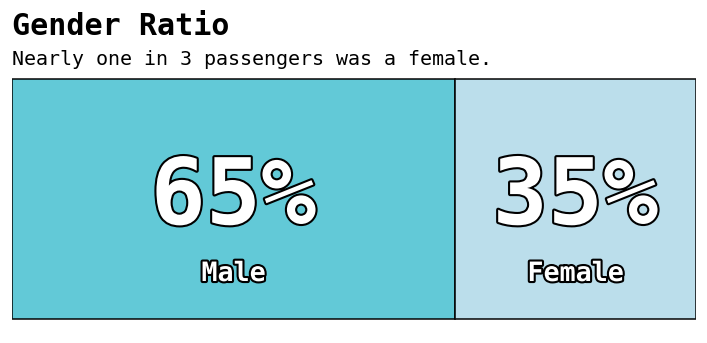

In [14]:
def gender_ratio() :
    mf_ratio = pd.crosstab(index = ['1'], columns = df_train.Sex, normalize = True)

    fig, ax = plt.subplots(1, 1, facecolor = 'white', figsize = (6, 2.5), dpi = 120)

    ax.barh(mf_ratio.index, mf_ratio['male'], 
            color = '#51C4D3', alpha = 0.9, label = 'Male', edgecolor = 'black')
    ax.barh(mf_ratio.index, mf_ratio['female'], left = mf_ratio['male'], 
            color = '#B4DBE9', alpha = 0.9, label = 'Female', edgecolor = 'black')

    ax.set(xlim = [0, 1])
    ax.tick_params(left = False, 
                   bottom = False, 
                   labelleft = False, 
                   labelbottom = False)

    for s in ['top', 'left', 'right', 'bottom'] :
        ax.spines[s].set_visible(False)

    for i in mf_ratio.index :
        ax.annotate(f"{mf_ratio['male'][i] :.0%}", 
                   xy = (mf_ratio['male'][i] / 2, i),
                   va = 'center', ha = 'center', fontsize = 55, fontweight = 'bold', fontfamily = 'monospace',
                   color = 'white', path_effects = [pe.withStroke(linewidth = 2.5, foreground = "black")])

        ax.annotate("Male", 
                   xy = (mf_ratio['male'][i] / 2, -0.25),
                   va = 'center', ha = 'center', fontsize = 16, fontweight = 'bold', fontfamily = 'monospace',
                   color = 'white', path_effects = [pe.withStroke(linewidth = 2.5, foreground = "black")])

        ax.annotate(f"{mf_ratio['female'][i] :.0%}", 
                   xy = (mf_ratio['male'][i] + mf_ratio['female'][i] / 2, i),
                   va = 'center', ha = 'center', fontsize = 55, fontweight = 'bold', fontfamily = 'monospace',
                   color = 'white', path_effects = [pe.withStroke(linewidth = 2.5, foreground = "black")])
        ax.annotate("Female", 
                   xy = (mf_ratio['male'][i] + mf_ratio['female'][i] / 2, -0.25),
                   va = 'center', ha = 'center', fontsize = 16, fontweight = 'bold', fontfamily = 'monospace',
                   color = 'white', path_effects = [pe.withStroke(linewidth = 2.5, foreground = "black")])

    fig.text(0.025, 1.05,'Gender Ratio', 
         fontfamily = 'monospace', 
         fontsize = 18, 
         fontweight = 'bold',
         color = 'k')
    fig.text(0.025, 0.95,'Nearly one in 3 passengers was a female.', 
         fontfamily = 'monospace', 
         fontsize = 12,
         color = 'k')

    ax.legend().set_visible(False)

    plt.tight_layout();
    
gender_ratio()

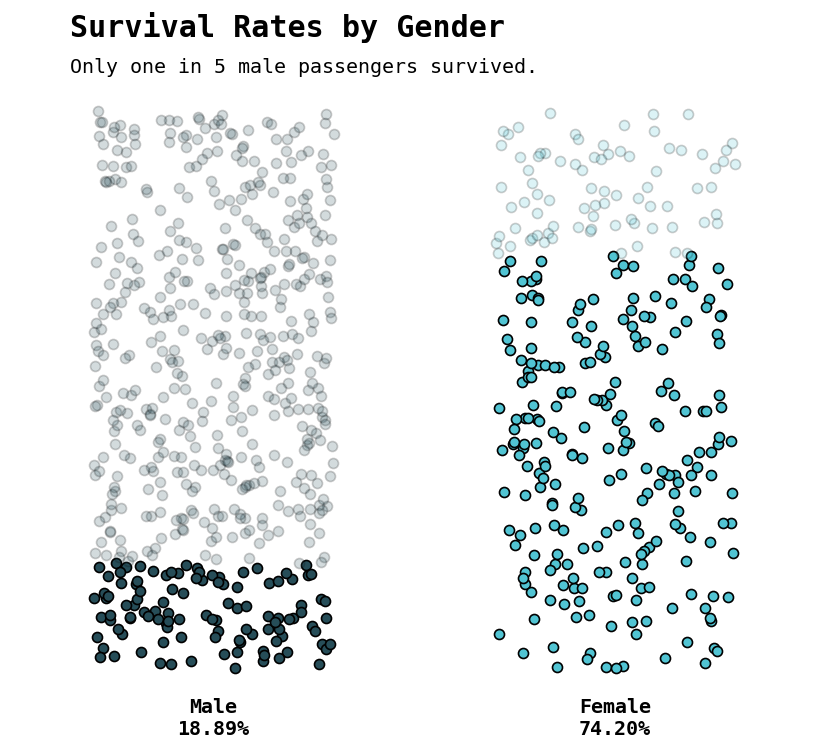

In [15]:
def survival_rates_by_gender() :
    survival_rate = df_train.groupby(['Sex']).mean()[['Survived']]
    male_rate = survival_rate.loc['male']
    female_rate = survival_rate.loc['female']

    male_pos = np.random.uniform(0, male_rate, len(df_train[(df_train['Sex'] == 'male') & (df_train['Survived'] == 1)]))
    male_neg = np.random.uniform(male_rate, 1, len(df_train[(df_train['Sex'] == 'male') & (df_train['Survived'] == 0)]))
    female_pos = np.random.uniform(0, female_rate, len(df_train[(df_train['Sex'] == 'female') & (df_train['Survived'] == 1)]))
    female_neg = np.random.uniform(female_rate, 1, len(df_train[(df_train['Sex'] == 'female') & (df_train['Survived'] == 0)]))

    fig, ax = plt.subplots(1, 1, figsize = (7, 6), dpi = 120)

    np.random.seed(42)

    # Male Stripplot
    ax.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), 
               male_pos, 
               color = '#264D58', 
               edgecolor = 'k', 
               label = 'Men Survivors')
    ax.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), 
               male_neg, 
               color = '#264D58', 
               edgecolor = 'k', 
               alpha = 0.2, 
               label = 'Men Victims')

    # Female Stripplot
    ax.scatter(1 + np.random.uniform(-0.3, 0.3, len(female_pos)),
               female_pos, 
               color = '#51C4D3', 
               edgecolor = 'k', 
               label ='Women Survivors')
    ax.scatter(1 + np.random.uniform(-0.3, 0.3, len(female_neg)), 
               female_neg, 
               color = '#51C4D3', 
               edgecolor = 'k', 
               alpha = 0.2, 
               label = 'Women Victims')

    # Set Figure & Axes
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.03, 1.1)

    # Ticks
    ax.set_xticks([0, 1])
    ax.set_xticklabels([f'Male\n{male_rate[0] :.2%}', 
                        f'Female\n{female_rate[0] :.2%}'], 
                       fontweight = 'bold', 
                       fontfamily = 'monospace', 
                       fontsize = 12)
    ax.tick_params(bottom = False)
    ax.set_yticks([], minor = False)
    ax.set_ylabel('')

    # Spines
    for s in ["top", "right", "left", 'bottom'] :
        ax.spines[s].set_visible(False)

    # Title & Explanation
    fig.text(0.09, 1, 'Survival Rates by Gender', 
             fontweight = 'bold', 
             fontfamily = 'monospace', 
             fontsize = 18)    
    fig.text(0.09, 0.95, 'Only one in 5 male passengers survived.', 
             fontfamily = 'monospace',
             fontsize = 12)    
    ax.legend().set_visible(False)

    plt.tight_layout();

survival_rates_by_gender()   

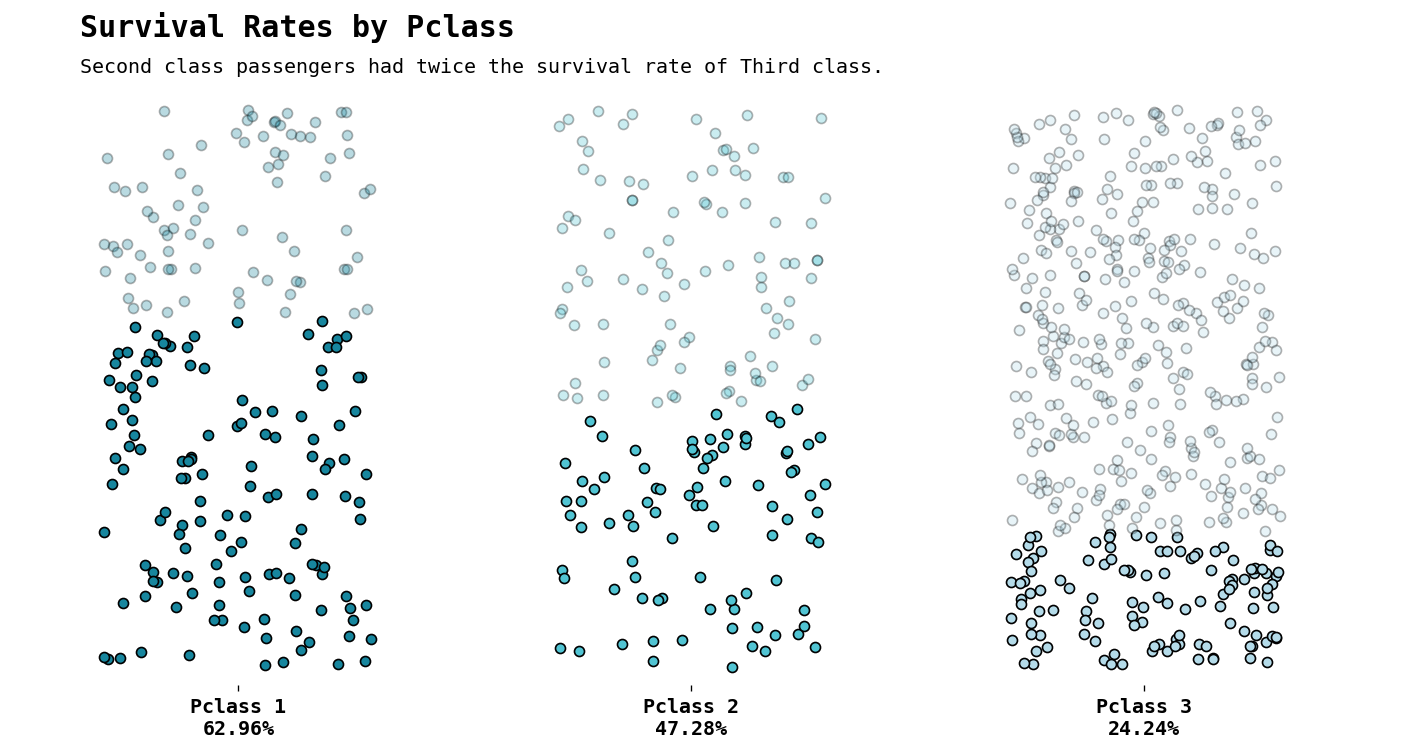

In [16]:
def survival_rates_by_pclass() :
    survival_rate = df_train.groupby(['Pclass']).mean()[['Survived']]
    p1_rate = survival_rate.loc[1]
    p2_rate = survival_rate.loc[2]
    p3_rate = survival_rate.loc[3]

    p1_pos = np.random.uniform(0, p1_rate, len(df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)]))
    p1_neg = np.random.uniform(p1_rate, 1, len(df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 0)]))
    p2_pos = np.random.uniform(0, p2_rate, len(df_train[(df_train['Pclass'] == 2) & (df_train['Survived'] == 1)]))
    p2_neg = np.random.uniform(p2_rate, 1, len(df_train[(df_train['Pclass'] == 2) & (df_train['Survived'] == 0)]))
    p3_pos = np.random.uniform(0, p3_rate, len(df_train[(df_train['Pclass'] == 3) & (df_train['Survived'] == 1)]))
    p3_neg = np.random.uniform(p3_rate, 1, len(df_train[(df_train['Pclass'] == 3) & (df_train['Survived'] == 0)]))

    fig, ax = plt.subplots(1, 1, figsize = (12, 6), dpi = 120)

    np.random.seed(42)

    ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_pos)), 
               p1_pos, 
               color = '#17869E', 
               edgecolor = 'k', 
               label = 'Pclasse 1 Survivors')
    ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_neg)), 
               p1_neg, color = '#17869E', 
               edgecolor = 'k', 
               alpha = 0.3, 
               label = 'Pclasse 1 Victims')
    ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_pos)), 
               p2_pos, 
               color = '#51C4D3', 
               edgecolor = 'k', 
               label = 'Pclasse 2 Survivors')
    ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_neg)), 
               p2_neg, 
               color = '#51C4D3', 
               edgecolor = 'k', 
               alpha = 0.3, 
               label = 'Pclasse 2 Victims')
    ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_pos)), 
               p3_pos, 
               color = '#B4DBE9', 
               edgecolor = 'k', 
               label = 'Pclasse 3 Survivors')
    ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_neg)), 
               p3_neg, 
               color = '#B4DBE9', 
               edgecolor = 'k', 
               alpha = 0.3, 
               label = 'Pclasse 3 Victims')

    # Set Figure & Axes
    ax.set_xlim(-0.5, 2.6)
    ax.set_ylim(-0.03, 1.1)

    # Ticks
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels([f'Pclass 1\n{p1_rate[0] :.2%}', 
                        f'Pclass 2\n{p2_rate[0] :.2%}', 
                        f'Pclass 3\n{p3_rate[0] :.2%}'], 
                       fontweight = 'bold', 
                       fontfamily = 'monospace', 
                       fontsize = 12)
    ax.set_yticks([], minor = False)
    ax.set_ylabel('')

    # Spines
    for s in ["top", "right", "left", 'bottom'] :
        ax.spines[s].set_visible(False)

    # Title & Explanation
    fig.text(0.06, 1, 'Survival Rates by Pclass', 
             fontweight = 'bold', 
             fontfamily = 'monospace', 
             fontsize = 18, 
             ha = 'left')    
    fig.text(0.06, 0.95, 'Second class passengers had twice the survival rate of Third class.', 
             fontfamily = 'monospace',
             fontsize = 12)
    ax.legend().set_visible(False)

    plt.tight_layout();

survival_rates_by_pclass()

## 4. Missing Values & Duplicates <a class="anchor" id="section_2_4"></a>
[Table of Content](#table_of_content)

- With 77% missing values the `Cabin` info seems pretty useless, it does not make sense for us to fill in missing values... 😟
- Roughly 1 in 5 `Age` are missing. `Age` is an important factor in determing survival so it is important to get this right
- The `Embarked` needs to be fixed and we also have 1 `Fare` missing from the test set
- The `Name` contains two *"Kelly, Mr. James"* and this is not a duplicate : 
>*"The body of fellow-third class passenger also named James Kelly was recovered"*.

Source, [Encyclopedia Titanica](https://www.encyclopedia-titanica.org/titanic-victim/james-kelly.html)

In [17]:
df.loc[(df['Name'] == 'Kelly, Mr. James')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
696,697,0.0,3,"Kelly, Mr. James",male,19.0,0,0,363592,8.0500,NaN,S
0,892,NaN,3,"Kelly, Mr. James",male,44.0,0,0,330911,7.8292,NaN,Q


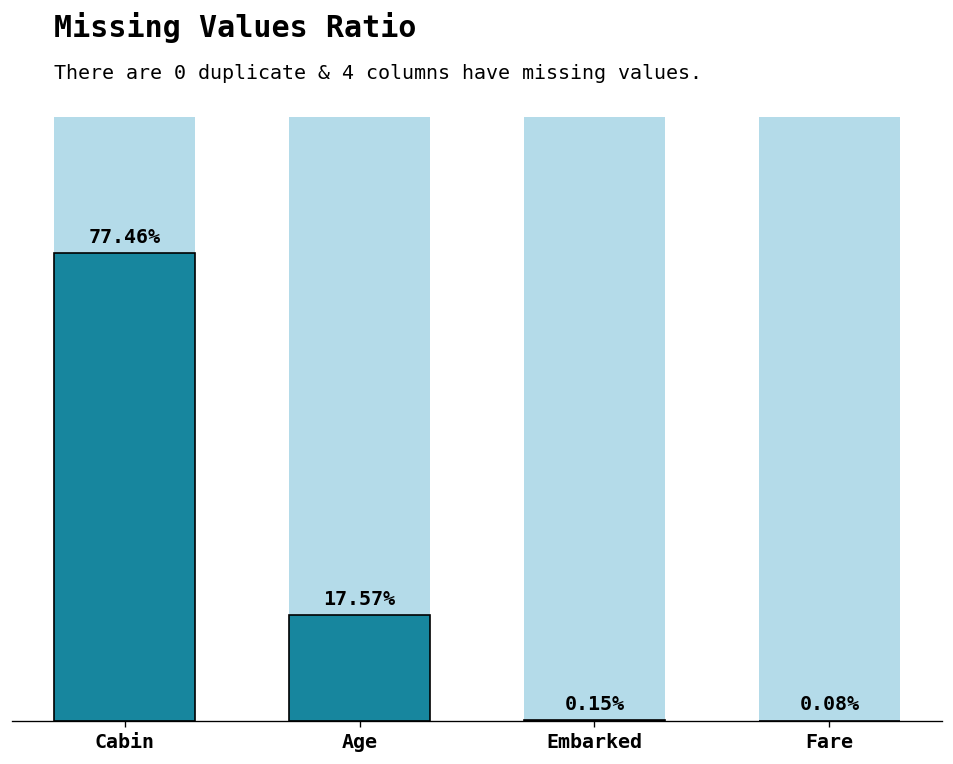

In [18]:
def missing_values_ratio() :
    drop_survived = combined.drop('Survived', axis = 1)
    nan_data = (drop_survived.isna().sum().sort_values(ascending = False) / len(combined) * 100)[:4]

    fig, ax = plt.subplots(1, 1, figsize = (10, 7), 
                           facecolor = 'white', 
                           dpi = 120)
    ax.set_facecolor('white')

    ax.bar(nan_data.index, 100, color = '#B4DBE9', width = 0.6)
    bar = ax.bar(nan_data.index, nan_data, color = '#17869E', width = 0.6, edgecolor = 'black')

    ax.bar_label(bar, 
                 fmt = '%.2f%%',
                 padding = 4,
                 fontsize = 12, 
                 fontfamily = 'monospace',
                 fontweight = 'bold',
                 color = 'black')

    ax.spines[["top", "right", "left"]].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks(nan_data.index)
    ax.set_xticklabels(['Cabin', 'Age', 'Embarked', 'Fare'], 
                       fontweight = 'bold', 
                       fontfamily = 'monospace', 
                       fontsize = 12, 
                       color = 'black')
    fig.text(0.16, 0.94, 'Missing Values Ratio', 
                 fontweight = "bold", 
                 fontfamily = 'monospace', 
                 fontsize = 18, 
                 color = 'black')


    fig.text(0.16, 0.89, f'There are {drop_survived.duplicated().sum()} duplicate & {len(drop_survived.columns[drop_survived.isna().any()].tolist())} columns have missing values.', 
             fontfamily = 'monospace',
             fontsize = 12,
             color = 'black');

missing_values_ratio()

## 5. Feature Engineering <a class="anchor" id="section_2_5"></a>
[Table of Content](#table_of_content)

This chapter of feature engineering is intended to allow us to fill in the missing values. Nevertheless, you will also find analyses of some variables that will be useful for the rest of our cruise.

### Title Extraction <a class="anchor" id="section_2_5_1"></a>

When looking at the passenger names one could wonder how to process them to extract useful information.

If you look closely at these first examples :

- Braund, Mr. Owen Harris
- Heikkinen, Miss. Laina
- Oliva y Ocana, Dona. Fermina
- Peter, Master. Michael J

You will notice that each name has a title in it ! This can be a simple Miss. or Mrs. but it can be sometimes something more sophisticated like Master, Sir or Dona. In that case, we might introduce additional information about the social status by simply parsing the name and extracting the title.

In [19]:
# Use a regular expression to search for a title. 
df_train['Title'], df_test['Title'], combined['Title'] = [df['Name'].str.extract(' ([A-Za-z]+)\.', expand = False) for df in [df_train, df_test, combined]]

All the titles belongs to one kind of gender except for "Dr".
>Note. — *"Master"* is an English honorific for boys and young men. According to the data, the title *'Master'* refers to boys aged 14 or younger.

In [20]:
pd.crosstab(df_train.Title, df_train.Sex)

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Create function `replace_titles` to update the titles, verifying `Sex` of the title 'Dr' before replacement.

In [21]:
# Feature Subset Selection
def replace_titles(x) :
    title = x['Title']
    if title in ['Dr'] : # Dr to Mr or Mrs
        return 'Mr' if x['Sex'] == 'male' else 'Mrs'
    elif title in ['Don', 'Sir', 'Capt', 'Col', 'Major', 'Rev', 'Jonkheer', 'Mr'] : # Male titles to Mr or Children
        return 'Children' if x['Age'] < 14.5 else 'Mr'
    elif title in ['Master'] : # Master to Children
        return 'Children'
    elif title in ['Lady', 'Countess', 'Dona', 'Mme', 'Miss', 'Mlle', 'Ms', 'Mrs'] : # Female titles to Children or Mrs
        return 'Children' if x['Age'] < 14.5 else 'Mrs'
    else :
        return title

# Run the function
df_train['Title'], df_test['Title'], combined['Title'] = [df.apply(replace_titles, axis = 1) for df in [df_train, df_test, combined]]

In [22]:
pd.crosstab(combined.Title, 
            combined.Sex,
            margins = True,
            margins_name = 'Subtotals')

Sex,female,male,Subtotals
Title,,,
Children,56,67,123
Mr,0,776,776
Mrs,410,0,410
Subtotals,466,843,1309


Fantastic ! [Encyclopedia Titanica](https://www.encyclopedia-titanica.org/children-on-titanic/) counts 128 children on the Titanic. Five children are not included in our data set :
- 2 crew members
- 3 cross-channel passengers — *Southampton* to *Cherbourg*

We have identified all the children with the function and some data cleaning. 🥳

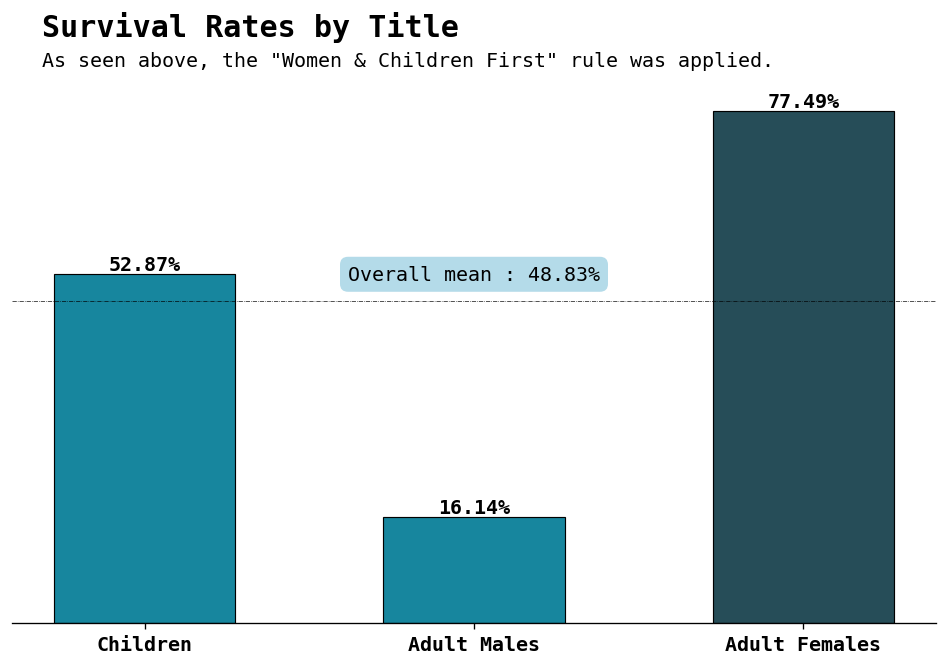

In [23]:
def survival_rates_by_title() :
    title_ratio = df_train.groupby('Title')['Survived'].mean() * 100

    fig, ax = plt.subplots(1, 1, figsize=(8, 5), dpi = 120)

    color_map = ['#17869E' for _ in range(len(title_ratio))]
    color_map[np.argmax(title_ratio)] = ['#264D58'][0]


    bars = ax.bar(title_ratio.index, 
                  title_ratio, 
                  color = color_map, 
                  width = 0.55, 
                  edgecolor = 'black', 
                  linewidth = 0.7)

    ax.spines[["top","right","left"]].set_visible(False)
    ax.bar_label(bars, 
                 fmt = '%.2f%%', 
                 fontsize = 12, 
                 fontfamily = 'monospace',
                 fontweight = 'bold')

    # mean line + annotation
    mean = df_train.groupby('Title')['Survived'].mean().mean() * 100
    ax.axhline(mean,
               color = 'black', 
               linewidth = 0.4, 
               linestyle = 'dashdot')
    ax.annotate(f"Overall mean : {mean :.2f}%", 
                xy = (1, mean + 4),
                va = 'center', 
                ha = 'center',
                color = 'black',
                fontsize = 12,
                fontfamily = 'monospace',
                bbox = dict(boxstyle = 'round',
                            pad = 0.4, 
                            facecolor = '#B4DBE9',
                            linewidth = 0))

    # Title & Subtitle    
    fig.text(0.05, 1.06, 'Survival Rates by Title', 
             fontsize = 18, 
             fontweight = 'bold', 
             fontfamily = 'monospace')
    fig.text(0.05, 1.01, 'As seen above, the "Women & Children First" rule was applied.', 
             fontsize = 12, 
             fontweight = 'light', 
             fontfamily = 'monospace')

    ax.set_yticks([])
    ax.set_xticks(title_ratio.index)
    ax.set_xticklabels(['Children', 'Adult Males', 'Adult Females'], fontweight = 'bold', fontfamily = 'monospace', fontsize = 12)
    ax.grid(axis = 'y', linestyle = '-', alpha = 0.5)
    ax.set_ylim(0, 80)

    fig.tight_layout()

survival_rates_by_title()

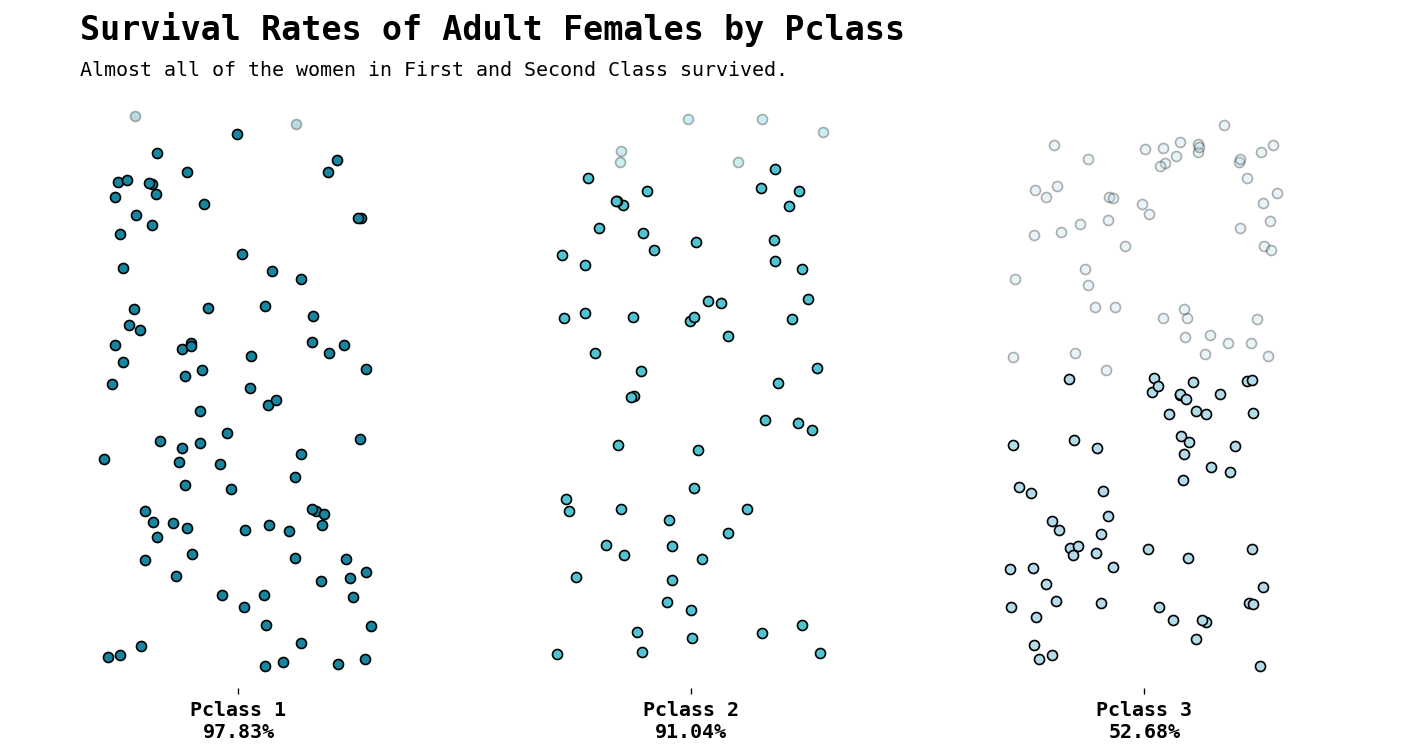

In [24]:
def survival_rates_of_adult_females_by_pclass() :
    female_survival_rate = df_train[['Pclass', 'Title', 'Survived']].groupby(['Pclass', 'Title']).mean()
    p1_rate = female_survival_rate.loc[1, 'Mrs']
    p2_rate = female_survival_rate.loc[2, 'Mrs']
    p3_rate = female_survival_rate.loc[3, 'Mrs']

    p1_pos = np.random.uniform(0, p1_rate, len(df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1) & (df_train['Title'] == 'Mrs')]))
    p1_neg = np.random.uniform(p1_rate, 1, len(df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 0) & (df_train['Title'] == 'Mrs')]))
    p2_pos = np.random.uniform(0, p2_rate, len(df_train[(df_train['Pclass'] == 2) & (df_train['Survived'] == 1) & (df_train['Title'] == 'Mrs')]))
    p2_neg = np.random.uniform(p2_rate, 1, len(df_train[(df_train['Pclass'] == 2) & (df_train['Survived'] == 0) & (df_train['Title'] == 'Mrs')]))
    p3_pos = np.random.uniform(0, p3_rate, len(df_train[(df_train['Pclass'] == 3) & (df_train['Survived'] == 1) & (df_train['Title'] == 'Mrs')]))
    p3_neg = np.random.uniform(p3_rate, 1, len(df_train[(df_train['Pclass'] == 3) & (df_train['Survived'] == 0) & (df_train['Title'] == 'Mrs')]))

    fig, ax = plt.subplots(1, 1, figsize = (12, 6), dpi = 120)

    np.random.seed(42)

    ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_pos)), 
               p1_pos, 
               color = '#17869E', 
               edgecolor = 'k', 
               label = 'Pclasse 1 Adult Females Survivors')
    ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_neg)), 
               p1_neg, color = '#17869E', 
               edgecolor = 'k', 
               alpha = 0.3, 
               label = 'Pclasse 1 Adult Females Victims')
    ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_pos)), 
               p2_pos, 
               color = '#51C4D3', 
               edgecolor = 'k', 
               label = 'Pclasse 2 Adult Females Survivors')
    ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_neg)), 
               p2_neg, 
               color = '#51C4D3', 
               edgecolor = 'k', 
               alpha = 0.3, 
               label = 'Pclasse 2 Adult Females Victims')
    ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_pos)), 
               p3_pos, 
               color = '#B4DBE9', 
               edgecolor = 'k', 
               label = 'Pclasse 3 Adult Females Survivors')
    ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_neg)), 
               p3_neg, 
               color = '#B4DBE9', 
               edgecolor = 'k', 
               alpha = 0.3, 
               label = 'Pclasse 3 Adult Females Victims')

    # Set Figure & Axes
    ax.set_xlim(-0.5, 2.6)
    ax.set_ylim(-0.03, 1.1)

    # Ticks
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels([f'Pclass 1\n{p1_rate[0] :.2%}', 
                        f'Pclass 2\n{p2_rate[0] :.2%}', 
                        f'Pclass 3\n{p3_rate[0] :.2%}'], 
                       fontweight = 'bold', 
                       fontfamily = 'monospace', 
                       fontsize = 12)
    ax.set_yticks([], minor = False)
    ax.set_ylabel('')

    # Spines
    for s in ["top", "right", "left", 'bottom'] :
        ax.spines[s].set_visible(False)

    # Title & Explanation
    fig.text(0.06, 1, 'Survival Rates of Adult Females by Pclass', 
             fontweight = 'bold', 
             fontfamily = 'monospace', 
             fontsize = 20, 
             ha = 'left')    
    fig.text(0.06, 0.95, 'Almost all of the women in First and Second Class survived.', 
             fontfamily = 'monospace',
             fontsize = 12)
    ax.legend().set_visible(False)

    plt.tight_layout();

survival_rates_of_adult_females_by_pclass()

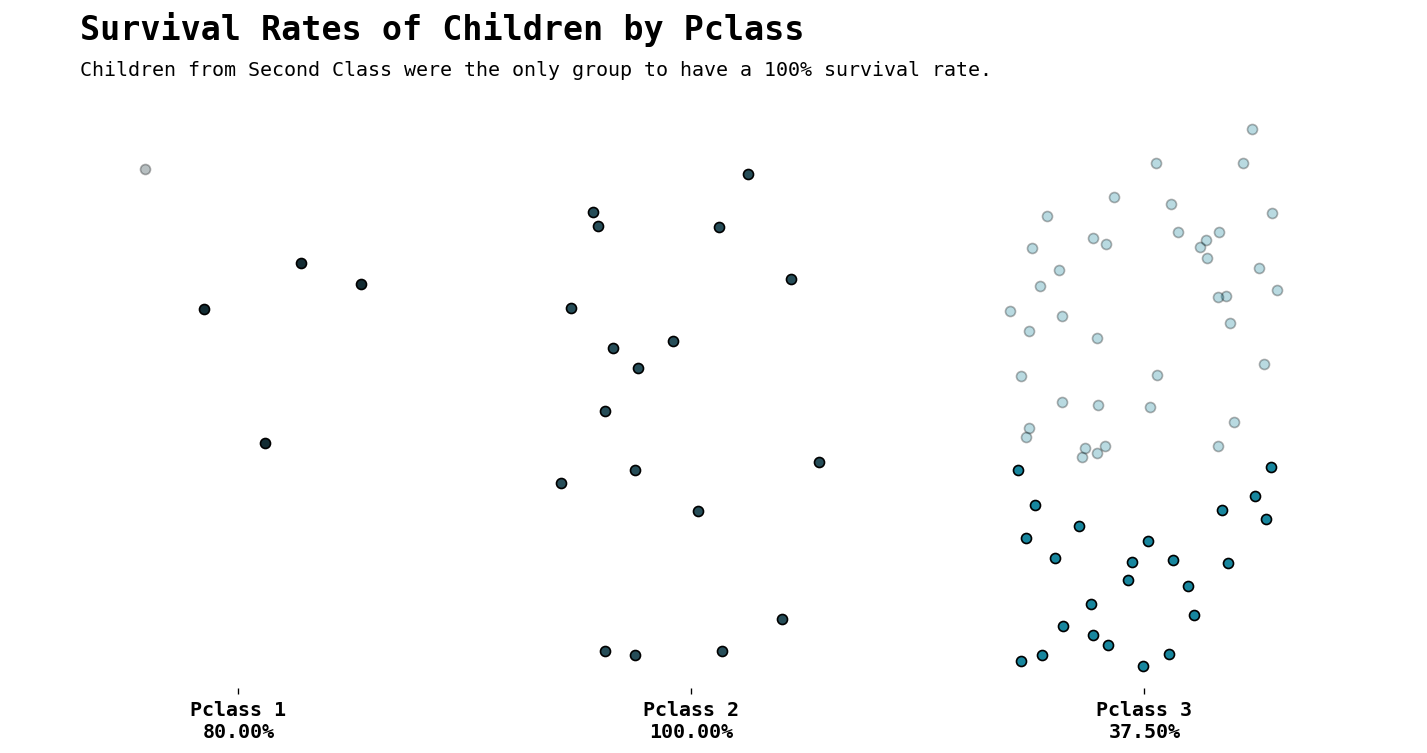

In [25]:
def survival_rates_of_children_by_pclass() :
    
    children_survival_rate = df_train[['Pclass', 'Title', 'Survived']].groupby(['Pclass', 'Title']).mean()
    p1_rate = children_survival_rate.loc[1, 'Children']
    p2_rate = children_survival_rate.loc[2, 'Children']
    p3_rate = children_survival_rate.loc[3, 'Children']

    p1_pos = np.random.uniform(0, p1_rate, len(df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1) & (df_train['Title'] == 'Children')]))
    p1_neg = np.random.uniform(p1_rate, 1, len(df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 0) & (df_train['Title'] == 'Children')]))
    p2_pos = np.random.uniform(0, p2_rate, len(df_train[(df_train['Pclass'] == 2) & (df_train['Survived'] == 1) & (df_train['Title'] == 'Children')]))
    p2_neg = np.random.uniform(p2_rate, 1, len(df_train[(df_train['Pclass'] == 2) & (df_train['Survived'] == 0) & (df_train['Title'] == 'Children')]))
    p3_pos = np.random.uniform(0, p3_rate, len(df_train[(df_train['Pclass'] == 3) & (df_train['Survived'] == 1) & (df_train['Title'] == 'Children')]))
    p3_neg = np.random.uniform(p3_rate, 1, len(df_train[(df_train['Pclass'] == 3) & (df_train['Survived'] == 0) & (df_train['Title'] == 'Children')]))

    fig, ax = plt.subplots(1, 1, figsize = (12, 6), dpi = 120)
    
    np.random.seed(42)

    ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_pos)), 
               p1_pos, 
               color = '#132C33', 
               edgecolor = 'k', 
               label = 'Pclasse 1 Children Survivors')
    ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_neg)), 
               p1_neg, color = '#132C33', 
               edgecolor = 'k', 
               alpha = 0.3, 
               label = 'Pclasse 1 Children Victims')
    ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_pos)), 
               p2_pos, 
               color = '#264D58', 
               edgecolor = 'k', 
               label = 'Pclasse 2 Children Survivors')
    ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_neg)), 
               p2_neg, 
               color = '#264D58', 
               edgecolor = 'k', 
               alpha = 0.3, 
               label = 'Pclasse 2 Children Victims')
    ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_pos)), 
               p3_pos, 
               color = '#17869E', 
               edgecolor = 'k', 
               label = 'Pclasse 3 Children Survivors')
    ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_neg)), 
               p3_neg, 
               color = '#17869E', 
               edgecolor = 'k', 
               alpha = 0.3, 
               label = 'Pclasse 3 Children Victims')

    # # Set Figure & Axes
    ax.set_xlim(-0.5, 2.6)
    ax.set_ylim(-0.03, 1.1)

    # # Ticks
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels([f'Pclass 1\n{p1_rate[0] :.2%}', 
                        f'Pclass 2\n{p2_rate[0] :.2%}', 
                        f'Pclass 3\n{p3_rate[0] :.2%}'], 
                       fontweight = 'bold', 
                       fontfamily = 'monospace', 
                       fontsize = 12)
    ax.set_yticks([], minor = False)
    ax.set_ylabel('')

    # Spines
    for s in ["top", "right", "left", 'bottom'] :
        ax.spines[s].set_visible(False)

    # Title & Explanation
    fig.text(0.06, 1, 'Survival Rates of Children by Pclass', 
             fontweight = 'bold', 
             fontfamily = 'monospace', 
             fontsize = 20, 
             ha = 'left')    
    fig.text(0.06, 0.95, 'Children from Second Class were the only group to have a 100% survival rate.', 
             fontfamily = 'monospace',
             fontsize = 12)
    ax.legend().set_visible(False)

    plt.tight_layout();
    
survival_rates_of_children_by_pclass()

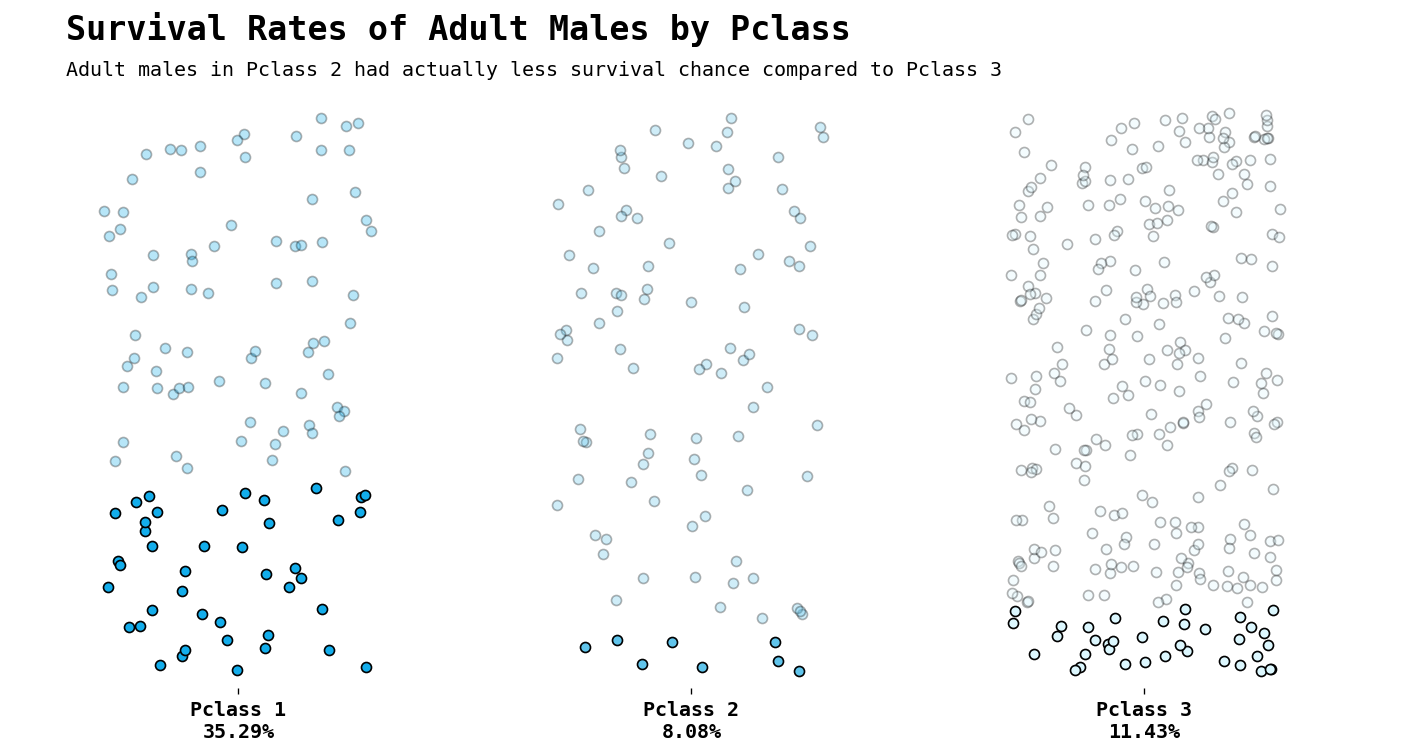

In [26]:
def survival_rates_of_adult_males_by_pclass() :
    
    male_survival_rate = df_train[['Pclass', 'Title', 'Survived']].groupby(['Pclass', 'Title']).mean()
    p1_rate = male_survival_rate.loc[1, 'Mr']
    p2_rate = male_survival_rate.loc[2, 'Mr']
    p3_rate = male_survival_rate.loc[3, 'Mr']

    p1_pos = np.random.uniform(0, p1_rate, len(df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1) & (df_train['Title'] == 'Mr')]))
    p1_neg = np.random.uniform(p1_rate, 1, len(df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 0) & (df_train['Title'] == 'Mr')]))
    p2_pos = np.random.uniform(0, p2_rate, len(df_train[(df_train['Pclass'] == 2) & (df_train['Survived'] == 1) & (df_train['Title'] == 'Mr')]))
    p2_neg = np.random.uniform(p2_rate, 1, len(df_train[(df_train['Pclass'] == 2) & (df_train['Survived'] == 0) & (df_train['Title'] == 'Mr')]))
    p3_pos = np.random.uniform(0, p3_rate, len(df_train[(df_train['Pclass'] == 3) & (df_train['Survived'] == 1) & (df_train['Title'] == 'Mr')]))
    p3_neg = np.random.uniform(p3_rate, 1, len(df_train[(df_train['Pclass'] == 3) & (df_train['Survived'] == 0) & (df_train['Title'] == 'Mr')]))

    fig, ax = plt.subplots(1, 1, figsize = (12, 6), dpi = 120)

    np.random.seed(42)

    ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_pos)), 
               p1_pos, 
               color = '#13ADEB', 
               edgecolor = 'k', 
               label = 'Pclasse 1 Adult Males Survivors')
    ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_neg)), 
               p1_neg, color = '#13ADEB', 
               edgecolor = 'k', 
               alpha = 0.3, 
               label = 'Pclasse 1 Adult Males Victims')
    ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_pos)), 
               p2_pos, 
               color = '#60C4EB', 
               edgecolor = 'k', 
               label = 'Pclasse 2 Adult Males Survivors')
    ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_neg)), 
               p2_neg, 
               color = '#60C4EB', 
               edgecolor = 'k', 
               alpha = 0.3, 
               label = 'Pclasse 2 Adult Males Victims')
    ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_pos)), 
               p3_pos, 
               color = '#DCF7FE', 
               edgecolor = 'k', 
               label = 'Pclasse 3 Adult Males Survivors')
    ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_neg)), 
               p3_neg, 
               color = '#DCF7FE', 
               edgecolor = 'k', 
               alpha = 0.3, 
               label = 'Pclasse 3 Adult Males Victims')

    # # Set Figure & Axes
    ax.set_xlim(-0.5, 2.6)
    ax.set_ylim(-0.03, 1.1)

    # # Ticks
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels([f'Pclass 1\n{p1_rate[0] :.2%}', 
                        f'Pclass 2\n{p2_rate[0] :.2%}', 
                        f'Pclass 3\n{p3_rate[0] :.2%}'], 
                       fontweight = 'bold', 
                       fontfamily = 'monospace', 
                       fontsize = 12)
    ax.set_yticks([], minor = False)
    ax.set_ylabel('')

    # Spines
    for s in ["top", "right", "left", 'bottom'] :
        ax.spines[s].set_visible(False)

    # Title & Explanation
    fig.text(0.05, 1, 'Survival Rates of Adult Males by Pclass', 
             fontweight = 'bold', 
             fontfamily = 'monospace', 
             fontsize = 20, 
             ha = 'left')    
    fig.text(0.05, 0.95, 'Adult males in Pclass 2 had actually less survival chance compared to Pclass 3', 
             fontfamily = 'monospace',
             fontsize = 12)
    ax.legend().set_visible(False)

    plt.tight_layout();

survival_rates_of_adult_males_by_pclass()

### Ticket Frequency Encoding <a class="anchor" id="section_2_5_2"></a>
[Table of Content](#table_of_content)

The passengers were traveling alone or with others passagers. If the passengers were traveling in a group then in most cases they had the same ticket number. 
Let's add a new column called `Ticket_Frequency` that will show the number of people for each ticket.

In [27]:
# Creating new feature
df_train['Ticket_Frequency'], df_test['Ticket_Frequency'], combined['Ticket_Frequency'] = [df['Ticket'].map(combined['Ticket'].value_counts()) for df in [df_train, df_test, combined]]

### Parch & SibSp Synthesis <a class="anchor" id="section_2_5_3"></a>
[Table of Content](#table_of_content)

`SibSp` and `Parch` can be combined into a new attribute `FamilySize` to give a better overview of the passengers with families. Let us see if this tallies with the `Ticket_Frequency`.

In [28]:
# Creating new feature
df_train['FamilySize'], df_test['FamilySize'], combined['FamilySize'] = [df['SibSp'] + df['Parch'] + 1 for df in [df_train, df_test, combined]]

In [30]:
Ticket_Freq, Family = df_train.groupby('Ticket_Frequency')['Survived'].mean(), df_train.groupby('FamilySize')['Survived'].mean()
Concat = pd.concat([Ticket_Freq, Family], axis = 1)
Concat

,Survived,Survived
1,0.270270,0.305400
2,0.513812,0.552795
3,0.666667,0.595960
4,0.738095,0.636364
5,0.333333,0.214286
6,0.217391,0.130435
7,0.208333,0.300000
8,0.384615,0.000000
11,0.000000,0.000000


⚠️ `FamilySize` excludes friends, neighbours, uncles, aunts, nieces, nephews, cousins, brothers & sisters-in-law

### FamilySize & Ticket Frequency Synthesis <a class="anchor" id="section_2_5_4"></a>
[Table of Content](#table_of_content)

In [40]:
print(f"There are {len(df_train[df_train['FamilySize'] != df_train['Ticket_Frequency']])} rows where FamilySize does not match with Ticket_Frequency.")
print(f"For remaining {len(df_train[df_train['FamilySize'] == df_train['Ticket_Frequency']])} odd rows these match perfectly.")

There are 200 rows where FamilySize does not match with Ticket_Frequency.
For remaining 691 odd rows these match perfectly.


Let us take the max of `FamilySize` & `Ticket_Frequency` and create a new column called `GroupSize`.

In [41]:
df_train['GroupSize'], df_test['GroupSize'], combined['GroupSize'] = [df[['FamilySize', 'Ticket_Frequency']].max(axis = 1) for df in [df_train, df_test, combined]]

Now let us plot the new column we have got.

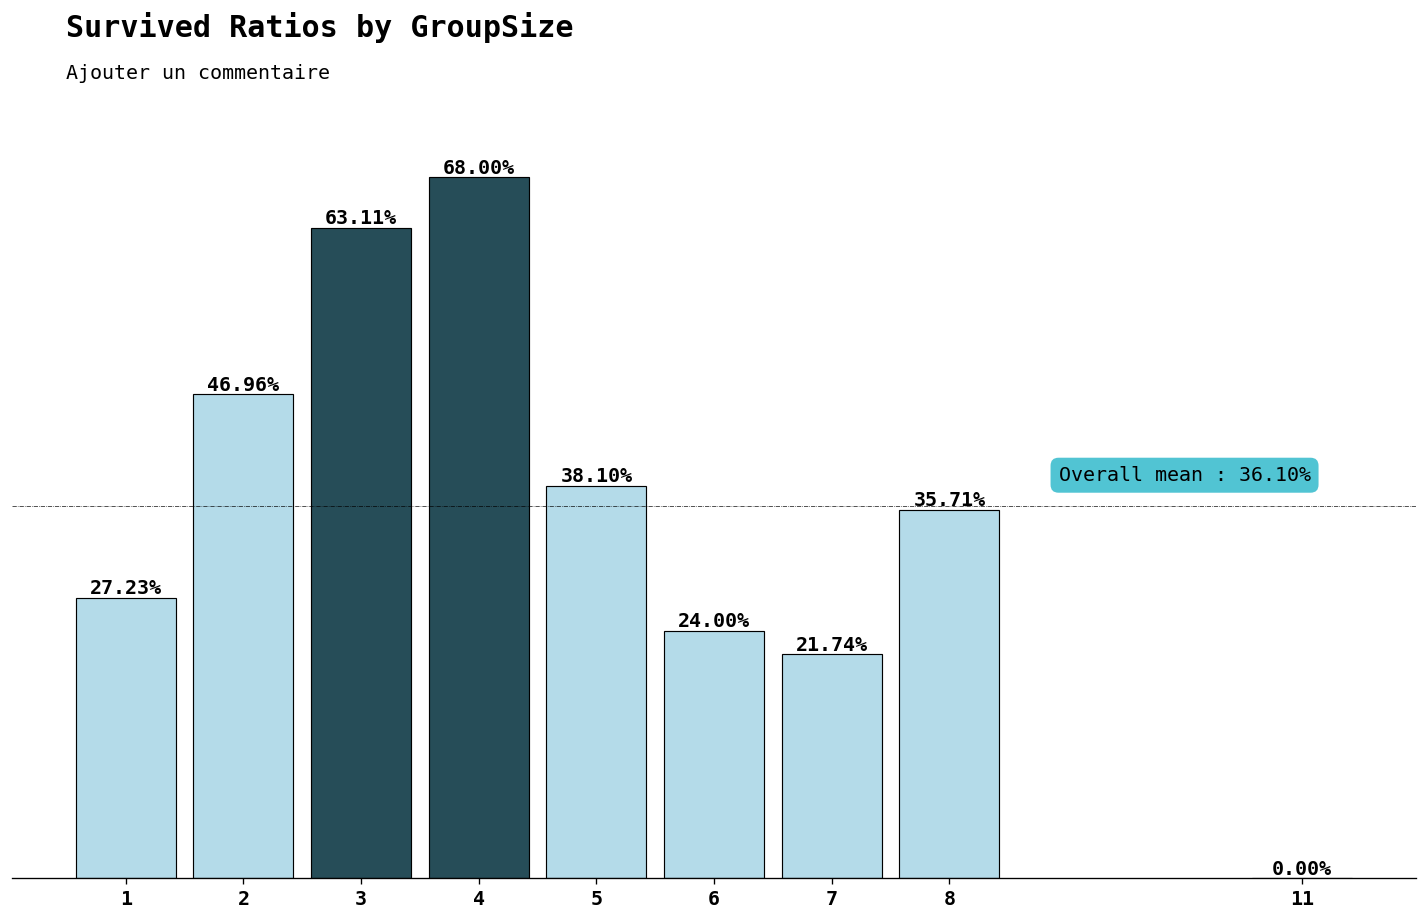

In [111]:
def survived_ratios_by_groupSize() :
    group_ratio = df_train.groupby('GroupSize')['Survived'].mean() * 100

    fig, ax = plt.subplots(1, 1, figsize=(12, 7), dpi = 120)
    clrs = ['#B4DBE9' if (x < max(group_ratio - 10 )) else '#264D58' for x in group_ratio]

    bars = ax.bar(group_ratio.index, 
                  group_ratio, 
                  color = clrs, 
                  width = 0.85, 
                  edgecolor = 'black', 
                  linewidth = 0.7)

    ax.spines[["top","right","left"]].set_visible(False)
    ax.bar_label(bars, 
                 fmt = '%.2f%%', 
                 fontsize = 12, 
                 fontfamily = 'monospace',
                 fontweight = 'bold')

    # mean line + annotation
    mean = df_train.groupby('GroupSize')['Survived'].mean().mean() * 100
    ax.axhline(mean,
               color = 'black', 
               linewidth = 0.4, 
               linestyle = 'dashdot')
    ax.annotate(f"Overall mean : {mean :.2f}%", 
                xy = (10, mean + 3),
                va = 'center', 
                ha = 'center',
                color = 'black',
                fontsize = 12,
                fontfamily = 'monospace',
                bbox = dict(boxstyle = 'round',
                            pad = 0.4, 
                            facecolor = '#51C4D3',
                            linewidth = 0,
                            alpha = 1))

    # Title & Subtitle    
    fig.text(0.05, 1.06, 'Survived Ratios by GroupSize', 
             fontsize = 18, 
             fontweight = 'bold', 
             fontfamily = 'monospace')
    fig.text(0.05, 1.01, 'Ajouter un commentaire', 
             fontsize = 12, 
             fontweight = 'light', 
             fontfamily = 'monospace')

    ax.set_yticks([])
    ax.set_xticks(group_ratio.index)
    ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '11'], fontweight = 'bold', fontfamily = 'monospace', fontsize = 12)
    ax.grid(axis = 'y', linestyle = '-', alpha = 0.4)
    ax.set_ylim(0, 75)

    fig.tight_layout()
    
survived_ratios_by_groupSize()

- It appears that solo travellers are at high risk.
- From 2-4 groups though the survival rate is higher and then 5 onwards the survival rate dips completely.

Intuitively, if you are travelling in a larger group, you would perhaps be made aware faster of the impending tragedy because of the sheer size of the group.<br>
Conversely, hand lone travellers, may have been slept soundly in their bunks and may have gotten the news late.<br>
On the other hand, as the group size increases, it may become more and more difficult to get everyone together and to safety, so perhaps with larger group size the trend turns negative and survivals dip.

While this may be true, our assumption is that this could be a case of correlation rather than causation.<br>
In short, `Pclass = 3` is the cause of high mortality and `GroupSize > 4` is simply correlated with higher mortality.

In [36]:
# .notnull() excludes df_test 
print(f'Pclass 1 & 2 in GroupSize between 2-4 : {len(df_train[(df_train.GroupSize.between(2, 4)) & (df_train.Pclass.between(1, 2))])} passengers') 
print(f'Pclass 3 in GroupSize between 2-4 : {len(df_train[(df_train.GroupSize.between(2, 4)) & (df_train.Pclass == 3)])} passengers')
print(f'Pclass 1 & 2 in GroupSize > 4 : {len(df_train[(df_train.GroupSize > 4) & (df_train.Pclass.between(1, 2))])} passengers')
print(f'Pclass 3 in GroupSize > 4 : {len(df_train[(df_train.GroupSize > 4) & (df_train.Pclass == 3)])} passengers')

Pclass 1 & 2 in GroupSize between 2-4 : 221 passengers
Pclass 3 in GroupSize between 2-4 : 132 passengers
Pclass 1 & 2 in GroupSize > 4 : 26 passengers
Pclass 3 in GroupSize > 4 : 64 passengers


Yep ! The data is as clear as it can be.<br>
Large groups were more prevalent in `Pclass 3` (~ 71%), which was less likely to survive anyway depending on the class of travel.<br>
It is a corelation not a causation !

However, we have observed that being alone increases the mortality rate. Let's quickly see if this is true.

In [37]:
print(f'Mortality rate solo passengers : {len(df_train[(df_train.GroupSize == 1) & (df_train.Survived == 0)]) / len(df_train[(df_train.GroupSize == 1)]) :.2%}')
print(f'Mortality rate solo adult males : {len(df_train[(df_train.GroupSize == 1) & (df_train.Survived == 0) & (df_train.Title == "Mr")]) / len(df_train[(df_train.GroupSize == 1) & (df_train.Title == "Mr")]) :.2%}')
print(f'Mortality rate solo adult female : {len(df_train[(df_train.GroupSize == 1) & (df_train.Survived == 0) & (df_train.Title == "Mrs")]) / len(df_train[(df_train.GroupSize == 1) & (df_train.Title == "Mrs")]) :.2%}')
print(f'Pclass 1 & 2 in GroupSize = 1 : {len(df_train[(df_train.GroupSize == 1) & (df_train.Pclass.between(1, 2))])} passengers')
print(f'Pclass 3 in GroupSize = 1 : {len(df_train[(df_train.GroupSize == 1) & (df_train.Pclass == 3)])} passengers')

Mortality rate solo passengers : 72.77%
Mortality rate solo adult males : 84.59%
Mortality rate solo adult female : 26.37%
Pclass 1 & 2 in GroupSize = 1 : 153 passengers
Pclass 3 in GroupSize = 1 : 295 passengers


Solo females do not follow this trend. However, it can be said that this is not a fair comparison as females have a better survival rate anyway.<br>
Furthermore, solo passengers travelled more in `Pclass 3` (~ 65%), which may explain their high overall mortality rate.

A stacked percentage bar chart would be useful for studying the ratio of classes in GroupSize.

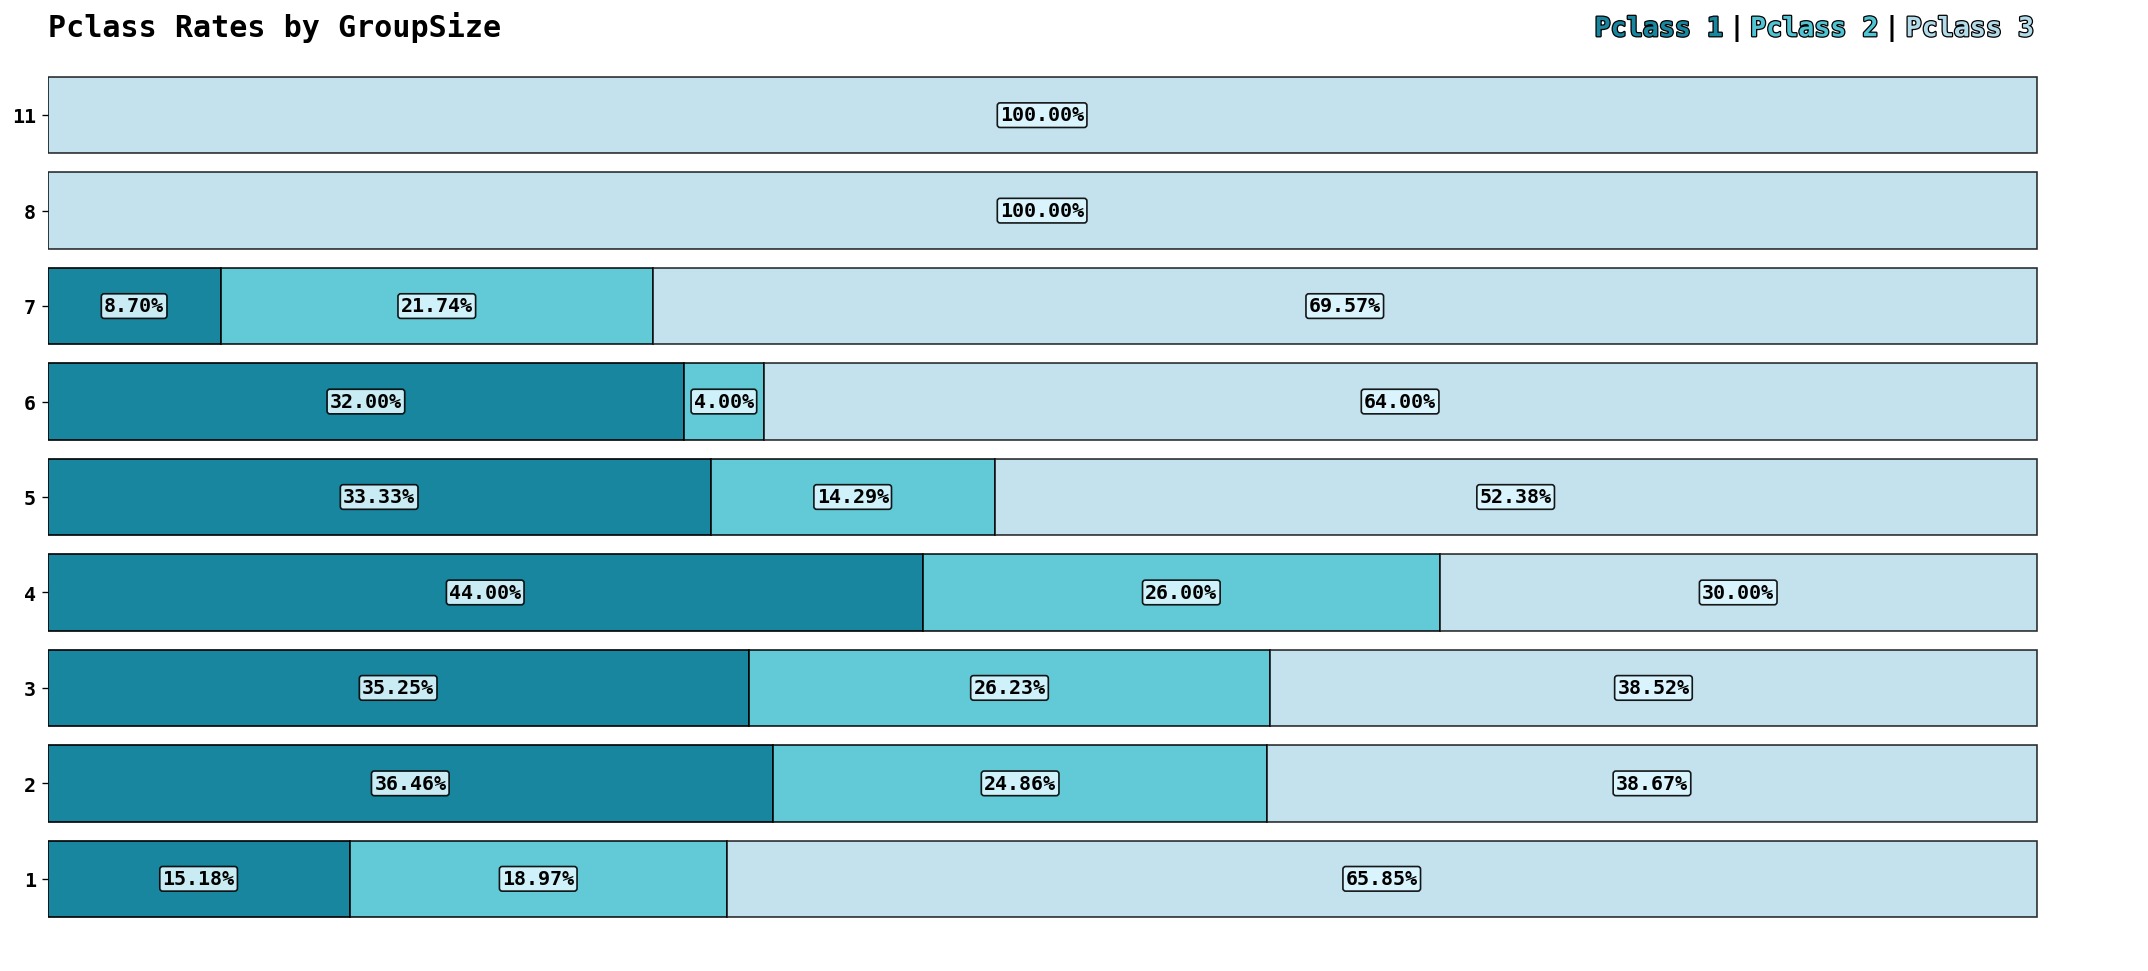

In [38]:
def pclass_rates_in_groupsize() :
    data = pd.crosstab(df_train['GroupSize'], df_train['Pclass'], normalize = 'index')

    fig, ax = plt.subplots(1, 1, figsize=(18, 8), dpi = 120)

    ax.barh(np.arange(1, 10, 1), data[1], color = '#17869E', alpha = 1, edgecolor = 'black')
    ax.barh(np.arange(1, 10, 1), data[2], left = data[1], color='#51C4D3', alpha = 0.9, edgecolor = 'black')
    ax.barh(np.arange(1, 10, 1), data[3], left = data[1] + data[2], color='#B4DBE9', alpha = 0.8, edgecolor = 'black')

    for c in ax.containers :
        labels = [f'{w:.2%}' if (w := v.get_width()) > 0 else '' for v in c ] 
        ax.bar_label(c, labels = labels, 
                     label_type = 'center', 
                     fontfamily = 'monospace',
                     fontsize = 12, 
                     fontweight = "bold", 
                     bbox = dict(boxstyle = 'round', 
                                 facecolor = '#DCF7FE', 
                                 alpha = 0.9, 
                                 pad = 0.14, 
                                 edgecolor = 'black'))

    for s in ['top', 'left', 'right', 'bottom'] :
        ax.spines[s].set_visible(False)

    ax.set_xticks([])
    ax.set_yticks(np.arange(1, 10, 1))
    ax.set_yticklabels(['1', '2', '3', '4', '5', '6', '7','8','11'], 
                       fontweight = 'bold', 
                       fontfamily = 'monospace', 
                       fontsize = 12)
    fig.text(0.025, 0.98, 'Pclass Rates by GroupSize', 
             fontsize = 18, 
             fontweight = 'bold', 
             fontfamily = 'monospace') 
    fig.text(0.741, 0.98, "Pclass 1", 
             fontweight = "bold", 
             fontfamily = 'monospace', 
             fontsize = 16, 
             color = '#17869E', 
             path_effects = [pe.withStroke(linewidth = 1.5,
                                           foreground = "black")])
    fig.text(0.803, 0.982, "|", 
             fontweight = "bold", 
             fontfamily = 'monospace', 
             fontsize = 16, 
             color = 'black')
    fig.text(0.813, 0.98, "Pclass 2", 
             fontweight = "bold", 
             fontfamily = 'monospace', 
             fontsize = 16, 
             color = '#51C4D3', 
             path_effects = [pe.withStroke(linewidth = 1.5,
                                           foreground = "black")])
    fig.text(0.875, 0.982, "|", 
             fontweight = "bold", 
             fontfamily = 'monospace', 
             fontsize = 16, 
             color = 'black')
    fig.text(0.885, 0.98, "Pclass 3",
             fontweight = "bold",
             fontfamily = 'monospace',
             fontsize = 16, 
             color = '#B4DBE9', 
             path_effects = [pe.withStroke(linewidth = 1.5,
                                           foreground = "black")])
    fig.tight_layout()

pclass_rates_in_groupsize()

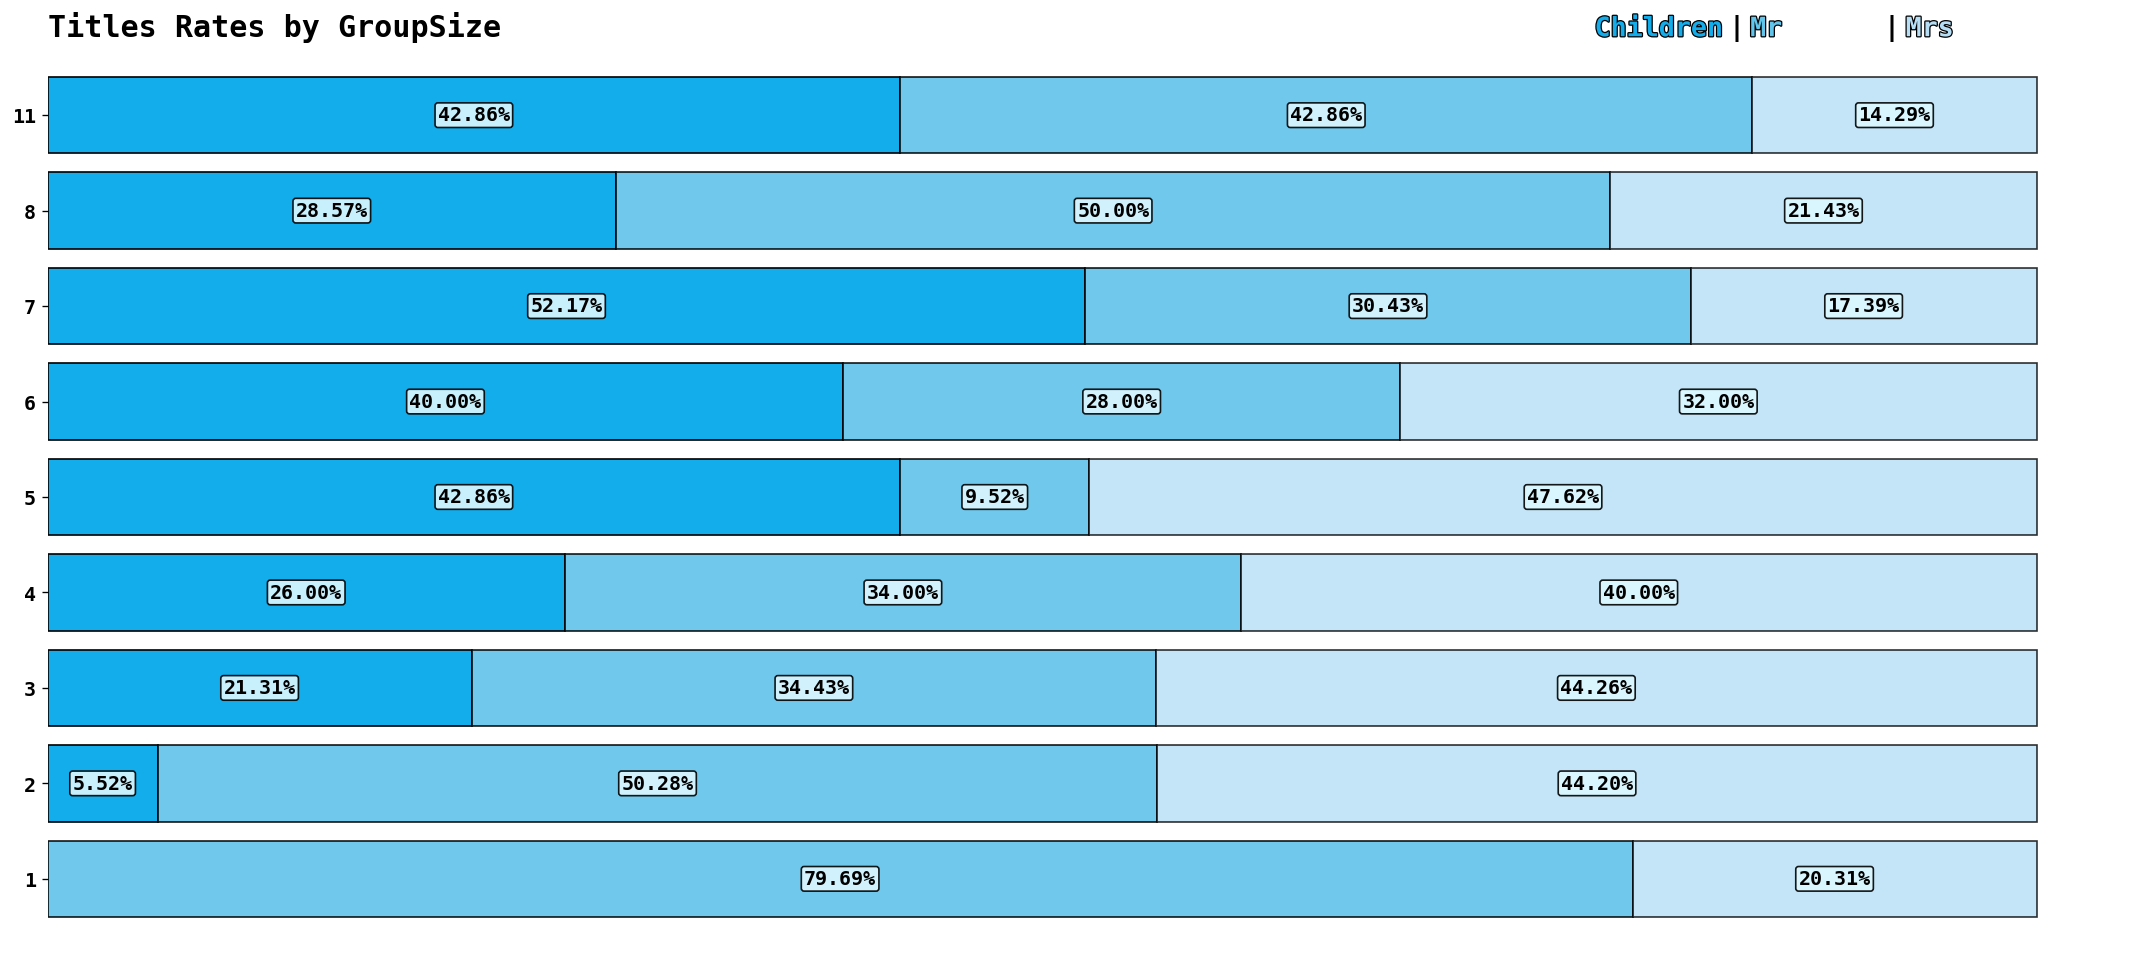

In [39]:
def pclass_rates_in_groupsize() :
    data = pd.crosstab(df_train['GroupSize'], df_train['Title'], normalize = 'index')

    fig, ax = plt.subplots(1, 1, figsize=(18, 8), dpi = 120)

    ax.barh(np.arange(1, 10, 1), data['Children'], color = '#13ADEB', alpha = 1, edgecolor = 'black')
    ax.barh(np.arange(1, 10, 1), data['Mr'], left = data['Children'], color='#60C4EB', alpha = 0.9, edgecolor = 'black')
    ax.barh(np.arange(1, 10, 1), data['Mrs'], left = data['Children'] + data['Mr'], color='#B6DFF6', alpha = 0.8, edgecolor = 'black')

    for c in ax.containers :
        labels = [f'{w:.2%}' if (w := v.get_width()) > 0 else '' for v in c ] 
        ax.bar_label(c, labels = labels, 
                     label_type = 'center', 
                     fontfamily = 'monospace',
                     fontsize = 12, 
                     fontweight = "bold", 
                     bbox = dict(boxstyle = 'round', 
                                 facecolor = '#DCF7FE', 
                                 alpha = 0.9, 
                                 pad = 0.14, 
                                 edgecolor = 'black'))

    for s in ['top', 'left', 'right', 'bottom'] :
        ax.spines[s].set_visible(False)

    ax.set_xticks([])
    ax.set_yticks(np.arange(1, 10, 1))
    ax.set_yticklabels(['1', '2', '3', '4', '5', '6', '7','8','11'], 
                       fontweight = 'bold', 
                       fontfamily = 'monospace', 
                       fontsize = 12)
    fig.text(0.025, 0.98, 'Titles Rates by GroupSize', 
             fontsize = 18, 
             fontweight = 'bold', 
             fontfamily = 'monospace') 
    fig.text(0.741, 0.98, "Children", 
             fontweight = "bold", 
             fontfamily = 'monospace', 
             fontsize = 16, 
             color = '#13ADEB', 
             path_effects = [pe.withStroke(linewidth = 1.5,
                                           foreground = "black")])
    fig.text(0.803, 0.982, "|", 
             fontweight = "bold", 
             fontfamily = 'monospace', 
             fontsize = 16, 
             color = 'black')
    fig.text(0.813, 0.98, "Mr", 
             fontweight = "bold", 
             fontfamily = 'monospace', 
             fontsize = 16, 
             color = '#60C4EB', 
             path_effects = [pe.withStroke(linewidth = 1.5,
                                           foreground = "black")])
    fig.text(0.875, 0.982, "|", 
             fontweight = "bold", 
             fontfamily = 'monospace', 
             fontsize = 16, 
             color = 'black')
    fig.text(0.885, 0.98, "Mrs",
             fontweight = "bold",
             fontfamily = 'monospace',
             fontsize = 16, 
             color = '#B6DFF6', 
             path_effects = [pe.withStroke(linewidth = 1.5,
                                           foreground = "black")])
    fig.tight_layout()

pclass_rates_in_groupsize()



In summary, `GroupSize` does not seem to have a very important role to play in survival.<br>
It may give some unnecessary false positives and it is questionable whether this column is relevant enough to be introduced into the machine learning model.

### Fare Transformation <a class="anchor" id="section_2_5_5"></a>
[Table of Content](#table_of_content)

`Fare` is actually the total fare for a group. If Ticket num is same, then fare is the sum of all tickets having the same ticket number. So divide `Fare` by the `Ticket_frequency` to get actual fare.

In [40]:
# Let's get fare per person
df_train['Pfare'], df_test['Pfare'], combined['Pfare'] = [df['Fare'] / df['Ticket_Frequency'] for df in [df_train, df_test, combined]]

Let's analyse only solo passengers in order to have a homogeneous group.

In [41]:
Pfare_analysis = df.query('GroupSize == 1')

Pfare_analysis.groupby(['Pclass', 'Embarked']).agg(Mean = ('Pfare', 'mean'), 
                                                   Median = ('Pfare', 'median'), 
                                                   Min = ('Pfare', 'min'), 
                                                   Max = ('Pfare', 'max'))

Mean   Median      Min      Max
Pclass Embarked                                      
1      C         31.629033  29.7000  25.7417  50.4958
       S         27.458206  26.5500   0.0000  50.4958
2      C         14.137492  13.8625  12.0000  15.5792
       Q         11.735114  12.3500   9.6875  12.3500
       S         11.956713  13.0000   0.0000  16.0000
3      C          7.268198   7.2292   4.0125   8.7125
       Q          7.715485   7.7500   6.7500   8.4583
       S          7.994364   7.8958   6.2375  10.5167

The Titanic was on her maiden voyage, a return trip from Britain to America. The outward route was to be :
- Southampton, *England* 
- Cherbourg, *France* 
- Cobh, known from 1849 until 1920 as Queenstown, *Ireland* 
- New York, *USA*

If in 1912 the fare was different depending on the port of embarkation, according to our data the difference is insignificant or imperceptible.<br>
Knowing this, we will not use the variable `Embarked` to fill in the missing values in `Pfare`.

## 6. Handling Missing Data <a class="anchor" id="section_2_6"></a>
[Table of Content](#table_of_content)

### Age Missing Values <a class="anchor" id="section_2_6_1"></a>

About 18% of the values are missing. Median is used because ages distribution is not always normal, so it's generally preferred over mean.

We need to dig a little deeper and determine the median `Age` per `GroupSize`, `Pclass` and `Title` because : 
- First class passengers were much older than the other classes
- Male passangers were older than female & adult passengers were much older than children 😲
- `Groupsize` provides an interesting granularity

In [42]:
df_train.groupby(['Pclass', 'Title']).agg(Median = ('Age', 'median'),
                                    Standard_Deviation = ('Age', 'std'))

Median  Standard_Deviation
Pclass Title                               
1      Children     4.0            5.789411
       Mr          42.0           13.281119
       Mrs         35.0           13.085873
2      Children     3.0            3.318226
       Mr          31.0           12.221705
       Mrs         30.0           10.090266
3      Children     5.0            4.124415
       Mr          26.0           10.261415
       Mrs         24.5            9.923104

In [43]:
df_train.groupby(['GroupSize', 'Title']).agg(Median = ('Age', 'median'),
                                             Standard_Deviation = ('Age', 'std'))

Median  Standard_Deviation
GroupSize Title                               
1         Mr          30.0           12.943604
          Mrs         26.5           11.492392
2         Children     5.5            5.090981
          Mr          30.0           11.272628
          Mrs         29.5           12.163226
3         Children     3.5            3.042885
          Mr          34.0           14.052977
          Mrs         31.0           12.177681
4         Children     5.0            4.806096
          Mr          25.5            9.605554
          Mrs         33.0            8.610140
5         Children     7.5            4.356850
          Mr          27.0                 NaN
          Mrs         39.0           12.103259
6         Children     4.0            3.325487
          Mr          36.0           16.673332
          Mrs         24.5           12.305632
7         Children     5.5            4.033008
          Mr          21.0            8.223080
          Mrs         29.5           11.676187
8         Children    10.0            4.991660
          Mr          30.0            3.000000
          Mrs         39.0           14.571662
11        Children     7.0            4.725816
          Mr          18.0            1.527525
          Mrs         20.0                 NaN

In [44]:
# Define a function called fill_age
def fill_age(x) :
    grp = df_train.groupby(['GroupSize', 'Pclass', 'Title'], as_index = False)['Age'].median()
    return grp[(grp.GroupSize == x.GroupSize) & (grp.Pclass == x.Pclass) & (grp.Title == x.Title)]['Age'].values[0]

df_train['Age'], df_test['Age'], combined['Age'] = [df.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis = 1) for df in [df_train, df_test, combined]]

# Check missing Age values
for df in [df_train, df_test, combined] :
    print(f'Missing values for Age in {df.name} : {df.Age.isna().sum()}')

Missing values for Age in df_train : 0
Missing values for Age in df_test : 0
Missing values for Age in combined : 0


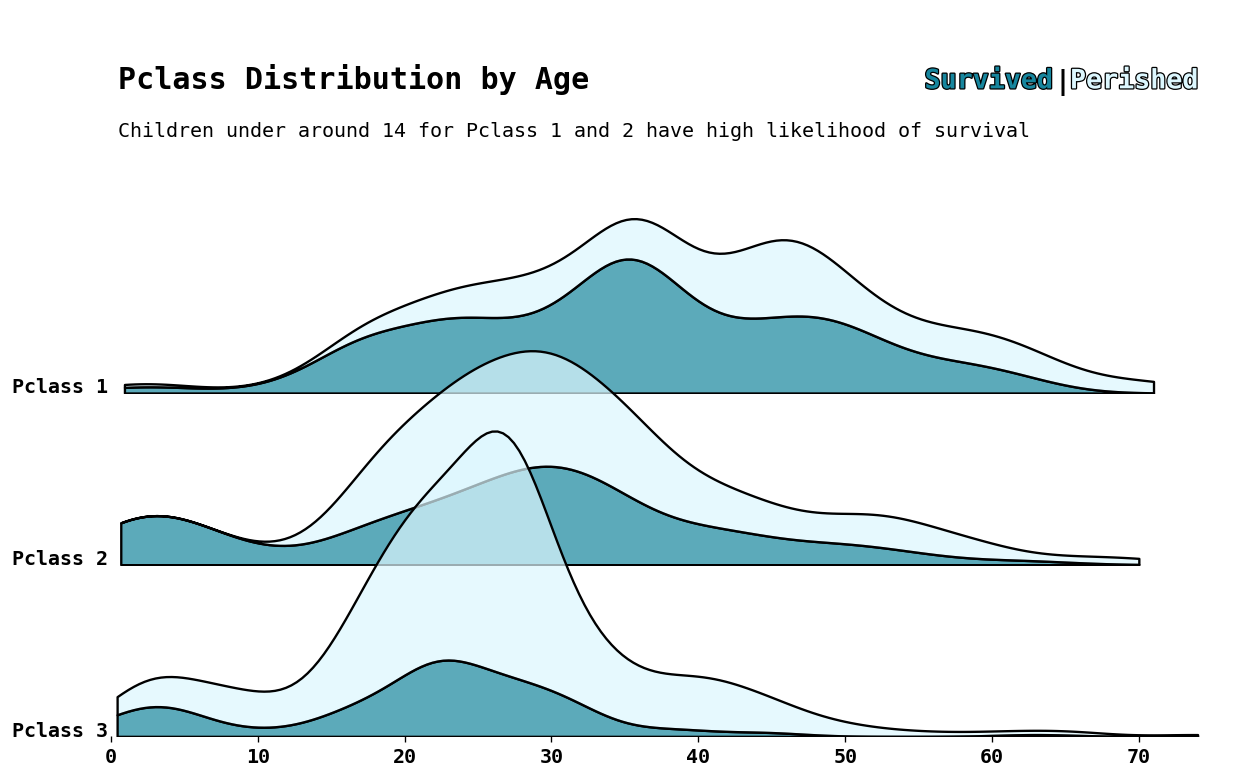

In [45]:
def pclass_distribution_by_age() :
    fig = plt.figure(figsize = (12, 8), dpi = 120)
    gs = fig.add_gridspec(3, 1)
    gs.update(hspace = -0.55)

    axes = list()
    for idx, cls in zip(range(3), sorted(df_train['Pclass'].unique())) :
        axes.append(fig.add_subplot(gs[idx, 0]))
        sns.kdeplot(x = 'Age', 
                    data = df_train[df_train['Pclass'] == cls], 
                    fill = True,
                    ax = axes[idx],
                    cut = 0,
                    bw_method = 0.25, 
                    lw = 1.4,
                    edgecolor = 'black',
                    hue = 'Survived', 
                    palette = {0 : "#DCF7FE", 1 : "#17869E"},
                    multiple = 'stack',
                    alpha = 0.7) 
    
        axes[idx].set_ylim(0, 0.065)
        axes[idx].set_xlim(0, 76)
        axes[idx].set_yticks([])
        if idx != 2 : axes[idx].set_xticks([])
        axes[idx].set_ylabel('')
        axes[idx].set_xlabel('')
    
        axes[idx].spines[["top","right","left","bottom"]].set_visible(False)
        
        axes[idx].patch.set_alpha(0)
        axes[idx].text(-0.2, 0, 
                       f"Pclass {cls}",
                       fontweight = "bold", 
                       fontfamily = 'monospace', 
                       fontsize = 12,
                       ha = "right")
        if idx != 3 : axes[idx].get_legend().remove()
    axes[2].set_xticks(np.arange(0, 80, 10))
    axes[2].set_xticklabels(('0', '10', '20', '30', '40', '50', '60', '70'),
                            fontweight = 'bold', 
                            fontfamily = 'monospace', 
                            fontsize = 12)
    fig.text(0.13, 0.8, "Pclass Distribution by Age",
             fontweight = 'bold', 
             fontfamily = 'monospace', 
             fontsize = 18, 
             ha = 'left')
    fig.text(0.13, 0.75, 'Children under around 14 for Pclass 1 and 2 have high likelihood of survival', 
             fontfamily = 'monospace',
             fontsize = 12)
    fig.text(0.690, 0.8, 'Survived', 
             fontsize = 16, 
             fontweight = 'bold', 
             fontfamily = 'monospace', 
             ha = 'left',
             color = '#17869E', 
             path_effects = [pe.withStroke(linewidth = 1.5,
                                           foreground = "black")])
    fig.text(0.780, 0.8, '|', 
             fontsize = 16, 
             fontweight = 'bold',
             fontfamily = 'monospace',
             color = 'black')
    fig.text(0.791, 0.8, 'Perished', 
             fontsize = 16, 
             fontweight = 'bold',
             fontfamily = 'monospace',
             color = '#DCF7FE', 
             path_effects = [pe.withStroke(linewidth = 1.5, 
                                           foreground = "black")]);

pclass_distribution_by_age()

### Embarked Missing Values <a class="anchor" id="section_2_6_2"></a>
[Table of Content](#table_of_content)

`Embarked` is a feature that is not used in the model training. It is one of those features we decided to drop to prevent over fitting.

### Cabin Missing Values <a class="anchor" id="section_2_6_3"></a>
[Table of Content](#table_of_content)

There are too many (70%) missing values for this feature. We will not attempt to complete missing values in order to prevent adding noise.

### Fare Missing Values <a class="anchor" id="section_2_6_4"></a>
[Table of Content](#table_of_content)

Some passengers traveled for free on the Titanic, such as the *Guarantee Group*, the Belfast team sent by shipbuilders Harland & Wolff to accompany the crew and assist the mechanical team on the maiden voyage. 

We also decide to drop this group of men because they are too close to the crew members to be considered as passengers. 

In [46]:
# Convert 0 to NaN
df_train['Pfare'], df_test['Pfare'], combined['Pfare'] = [df['Pfare'].replace(0, np.nan) for df in [df_train, df_test, combined]]

# Check missing Pfare values
for df in [df_train, df_test, combined] :
    print(f'Missing values for Pfare in {df.name} : {df.Pfare.isna().sum()}')

# Show NaN values
display(combined[combined['Pfare'].isna()])

Missing values for Pfare in df_train : 16
Missing values for Pfare in df_test : 4
Missing values for Pfare in combined : 20


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket_Frequency,FamilySize,GroupSize,Pfare
179,180,0.0,3,"Leonard, Mr. Lionel",male,36.0,0,0,370160,0.0,NaN,S,Mr,6,1,6,NaN
263,264,0.0,1,"Harrison, Mr. William",male,45.0,0,0,112059,0.0,B94,S,Mr,1,1,1,NaN
271,272,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,370160,0.0,NaN,S,Mr,6,1,6,NaN
277,278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,21.0,0,0,239853,0.0,NaN,S,Mr,3,1,3,NaN
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,370160,0.0,NaN,S,Mr,6,1,6,NaN
413,414,0.0,2,"Cunningham, Mr. Alfred Fleming",male,21.0,0,0,239853,0.0,NaN,S,Mr,3,1,3,NaN
466,467,0.0,2,"Campbell, Mr. William",male,20.0,0,0,239853,0.0,NaN,S,Mr,3,1,3,NaN
481,482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,38.0,0,0,239854,0.0,NaN,S,Mr,1,1,1,NaN
597,598,0.0,3,"Johnson, Mr. Alfred",male,49.0,0,0,370160,0.0,NaN,S,Mr,6,1,6,NaN
633,634,0.0,1,"Parr, Mr. William Henry Marsh",male,29.0,0,0,112052,0.0,NaN,S,Mr,1,1,1,NaN


df_train.groupby(['Pclass', 'Title', 'Ticket_Frequency'], as_index = False)['Pfare'].median()- The zeros-Pfares might confuse the algorithms as most of them are within the 1st and 2nd class passengers
- We decide to replace all zeros or NaNs with the median `Pfare` of `Pclass` & `Title` 

In [48]:
df_train.groupby(['Pclass', 'Title'], as_index = False)['Pfare'].median()

,Pclass,Title,Pfare
0,1,Children,27.286100
1,1,Mr,30.000000
2,1,Mrs,30.000000
3,2,Children,8.750000
4,2,Mr,13.000000
5,2,Mrs,13.000000
6,3,Children,5.118545
7,3,Mr,7.800000
8,3,Mrs,7.750000


In [49]:
# Define a function called fill_pfare
def fill_pfare(x) :
    grp = df_train.groupby(['Pclass', 'Title'], as_index = False)['Pfare'].median()
    return grp[(grp.Pclass == x.Pclass) & (grp.Title == x.Title)]['Pfare'].values[0]

# Filling the missing values in Pfare
df_train['Pfare'], df_test['Pfare'], combined['Pfare'] = [df.apply(lambda x: fill_pfare(x) if np.isnan(x['Pfare']) else x['Pfare'], axis = 1) for df in [df_train, df_test, combined]]

# Check missing Pfare values
for df in [df_train, df_test, combined] :
    print(f'Missing values for Pfare in {df.name} : {df.Pfare.isna().sum()}')

Missing values for Pfare in df_train : 0
Missing values for Pfare in df_test : 0
Missing values for Pfare in combined : 0


## 7. Feature Engineering <a class="anchor" id="section_2_7"></a>
[Table of Content](#table_of_content)

Second chapter of feature engineering. Let's get down to business ! This is where you will find out how we handled variables to help our model predict survivors.

### Title & Pclass Synthesis <a class="anchor" id="section_2_7_1"></a>

We want to combine `Pclass` and `Title`. Together they give much more information than separately.

In [50]:
# Let us merge Pclass and Title to create a new column
df_train['Tclass'], df_test['Tclass'], combined['Tclass'] = [df['Title'] + df['Pclass'].astype(str) for df in [df_train, df_test, combined]]

How does Tclass depend on Age ? Let us plot violin-plot which is best suited for this :
- Violin plots show the distribution across the range (of `Age` in this case) and give a visual indication of outliers
- The white dot you see is the median
- The thick black line at the center is the first and third quartile

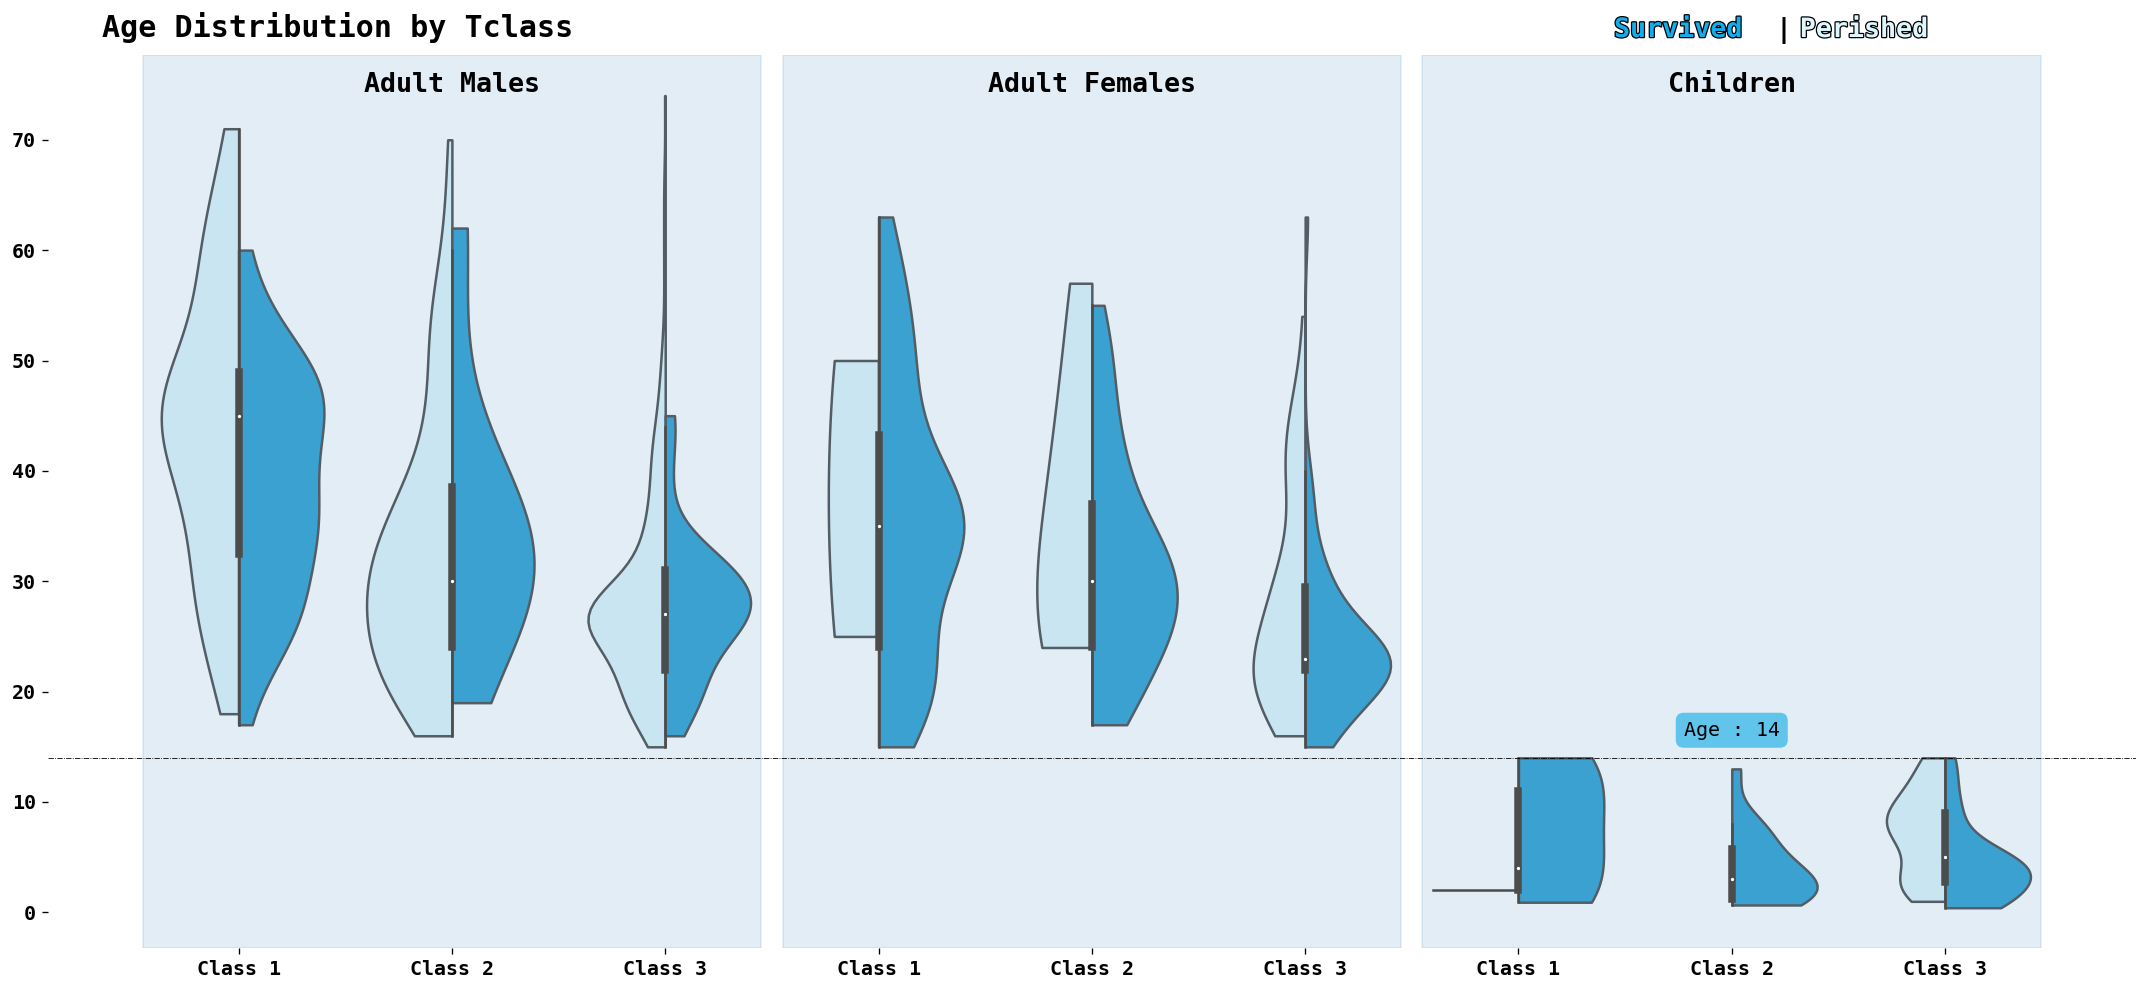

In [51]:
def age_distribution_by_tclass () :
    fig, ax = plt.subplots(1, 1, figsize=(18, 8), dpi = 120)
    sns.violinplot(data = df_train,
                   x = 'Tclass', 
                   y = 'Age',
                   hue = 'Survived', 
                   split = True, 
                   cut = 0,
                   order = ['Mr1', 'Mr2', 'Mr3', 'Mrs1', 'Mrs2', 'Mrs3', 'Children1', 'Children2', 'Children3'],
                   palette = {0 : "#DCF7FE", 1 : "#13ADEB"})
    age_max_children = df_train.groupby(['Title'])['Age'].max()[0]
    ax.axhline(age_max_children,
               color = 'black', 
               linewidth = 0.5, 
               linestyle = 'dashdot')
    ax.annotate(f"Age : {age_max_children :.0f}", 
                xy = (7, age_max_children + 2.5),
                va = 'center', 
                ha = 'center',
                color = 'black',
                fontsize = 12,
                fontfamily = 'monospace',
                bbox = dict(boxstyle = 'round',
                            pad = 0.4, 
                            facecolor = '#60C4EB',
                            linewidth = 0))
    ax.spines[["top", "bottom", "right", "left"]].set_visible(False)
    ax.set_xlabel('')
    ax.set_xticks(np.arange(0, 9, 1))
    ax.set_xticklabels(['Class 1', 'Class 2', 'Class 3', 'Class 1', 'Class 2', 'Class 3', 'Class 1','Class 2','Class 3'], 
                       fontweight = 'bold', 
                       fontfamily = 'monospace', 
                       fontsize = 12)
    ax.set_ylabel('')
    ax.set_yticks(np.arange(0, 80, 10))
    ax.set_yticklabels(np.arange(0, 80, 10), 
                       fontweight = 'bold', 
                       fontfamily = 'monospace', 
                       fontsize = 12)
    ax.get_legend().remove()
    fig.text(0.05, 1, "Age Distribution by Tclass",
             fontweight = 'bold', 
             fontfamily = 'monospace', 
             fontsize = 18, 
             ha = 'left')
    fig.text(0.75, 1, 'Survived', 
             fontsize = 16, 
             fontweight = 'bold', 
             fontfamily = 'monospace', 
             ha = 'left',
             color = '#13ADEB', 
             path_effects = [pe.withStroke(linewidth = 1.5,
                                           foreground = "black")])
    fig.text(0.825, 1, '|', 
             fontsize = 16, 
             fontweight = 'bold',
             fontfamily = 'monospace',
             color = 'black')
    fig.text(0.836, 1, 'Perished', 
             fontsize = 16, 
             fontweight = 'bold',
             fontfamily = 'monospace',
             color = '#DCF7FE', 
             path_effects = [pe.withStroke(linewidth = 1.5, 
                                           foreground = "black")])

    color =  ['#71A6D1', '#71A6D1', '#71A6D1']
    span_range = [[0, 2], [3, 5], [6, 8]]

    for idx, sub_title in enumerate(['Adult Males', 'Adult Females', 'Children']) :
        ax.annotate(sub_title,
                    xy = (sum(span_range[idx]) / 2, 75),
                    xytext = (0, 0), textcoords = 'offset points',
                    va = "center", ha = "center",
                    color = "black", fontsize = 16, fontweight = 'bold', fontfamily = 'monospace')
        ax.axvspan(span_range[idx][0] - 0.45, span_range[idx][1] + 0.45,  color = color[idx], alpha = 0.2)
    fig.tight_layout()
    
age_distribution_by_tclass ()

- Very few females over 60
- All children survive in Pclass 2
- Above age 45, almost all Pclass 3 adulte males expire. Between 20-30 adult males Pclass 3 have a decent survival chance
- Between 0-24 females in Pclass 1 & 2 have an excellent chance of survival

In [52]:
print(f"Survival rate of women under 24 in class 1 & 2 : {len(df_train[(df_train.Sex == 'female') & (df_train.Age < 24) & (df_train.Pclass != 3) & (df_train.Survived == True)]) / len(df_train[(df_train.Sex == 'female') & (df_train.Age < 24) & (df_train.Pclass != 3)]) :.2%}")

Survival rate of women under 24 in class 1 & 2 : 97.62%


In [53]:
#print(f"Survival rate of adult males above Age 46 in Pclass 1 : {len(df_train[(df_train.Tclass == 'Mr1') & (df_train.Age > 45) & (df_train.Survived == True)]) / len(df_train[(df_train.Tclass == 'Mr1') & (df_train.Age > 45)]) :.2%}")
#print(f"Survival rate of adult males above Age 46 in Pclass 2 : {len(df_train[(df_train.Tclass == 'Mr2') & (df_train.Age > 45) & (df_train.Survived == True)]) / len(df_train[(df_train.Tclass == 'Mr2') & (df_train.Age > 45)]) :.2%}")
#print(f"Survival rate of adult males above Age 46 in Pclass 3 : {len(df_train[(df_train.Tclass == 'Mr3') & (df_train.Age > 45) & (df_train.Survived == True)]) / len(df_train[(df_train.Tclass == 'Mr3') & (df_train.Age > 45)]) :.2%}")
#print(f"Survival rate of adult males between 20-30 in Pclass 1 : {len(df_train[(df_train.Tclass == 'Mr1') & (df_train.Age.between(20, 30)) & (df_train.Survived == True)]) / len(df_train[(df_train.Tclass == 'Mr1') & (df_train.Age.between(20, 30)) ]) :.2%}")
#print(f"Survival rate of adult males between 20-30 in Pclass 2 : {len(df_train[(df_train.Tclass == 'Mr2') & (df_train.Age.between(20, 30)) & (df_train.Survived == True)]) / len(df_train[(df_train.Tclass == 'Mr2') & (df_train.Age.between(20, 30)) ]) :.2%}")
#print(f"Survival rate of adult males between 20-30 in Pclass 3 : {len(df_train[(df_train.Tclass == 'Mr3') & (df_train.Age.between(20, 30)) & (df_train.Survived == True)]) / len(df_train[(df_train.Tclass == 'Mr3') & (df_train.Age.between(20, 30)) ]) :.2%}")

### Pfare Extraction <a class="anchor" id="section_2_7_2"></a>
[Table of Content](#table_of_content)

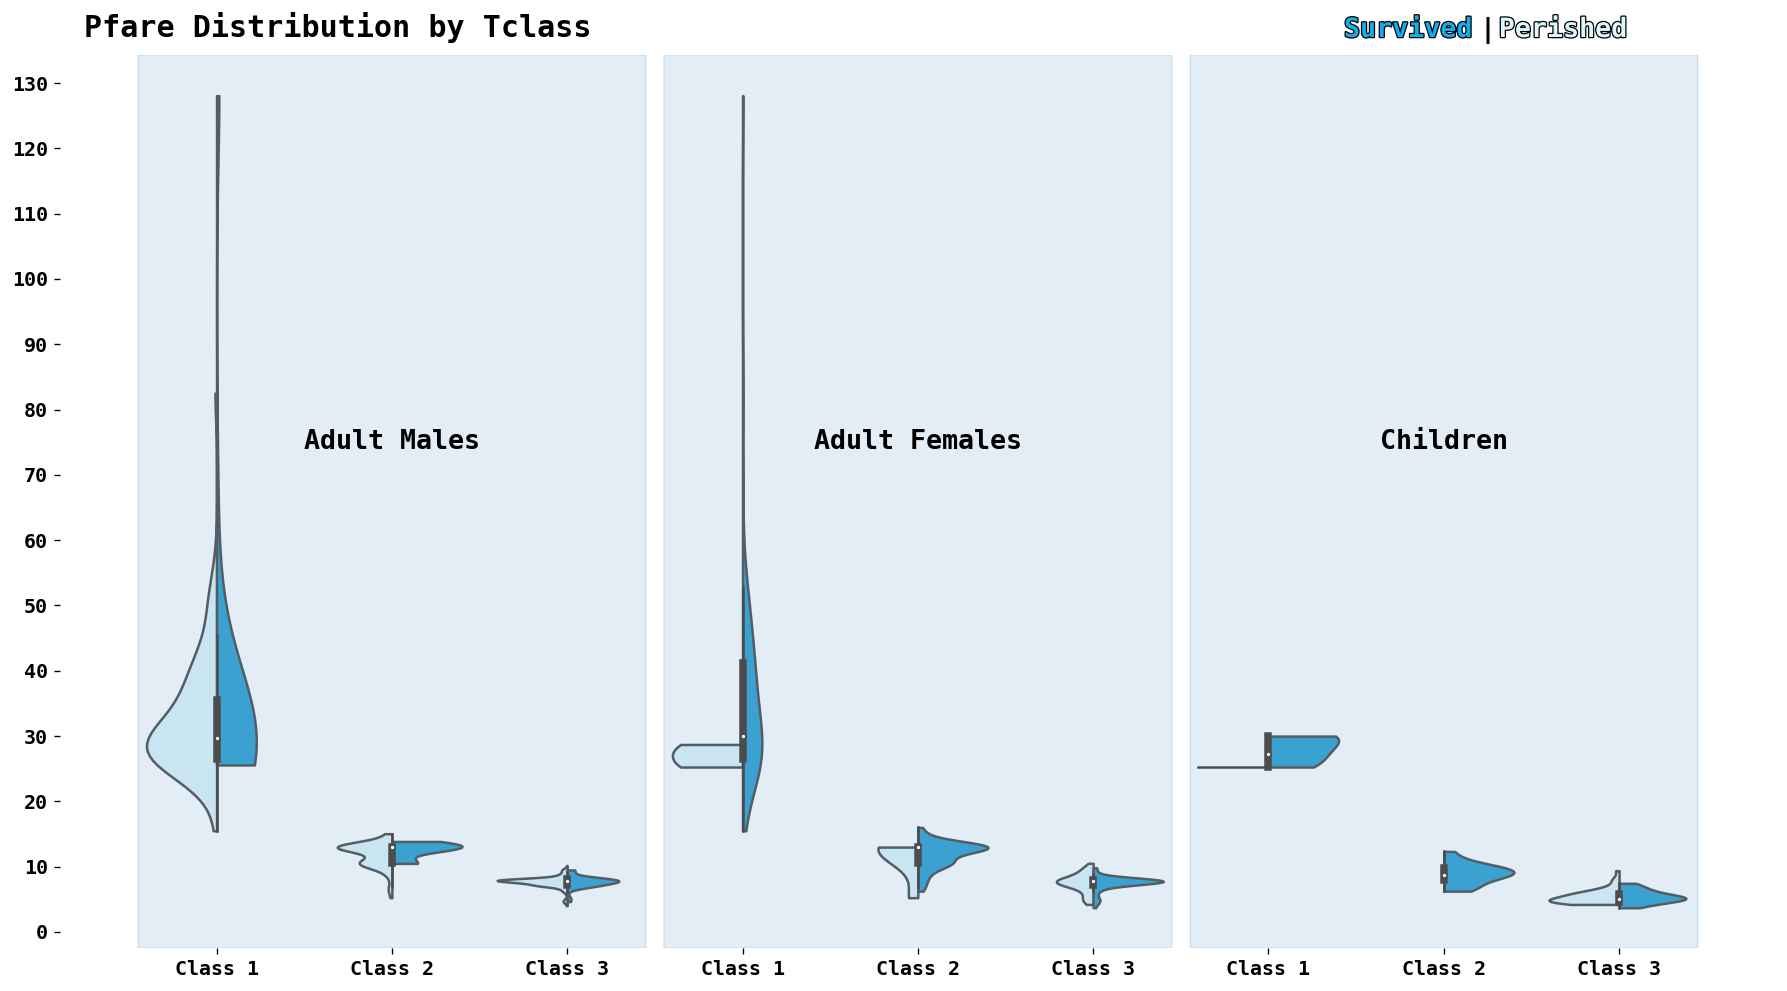

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8), dpi = 120)
sns.violinplot(data = df_train,
               x = 'Tclass', 
               y = 'Pfare',
               hue = 'Survived', 
               split = True, 
               cut = 0,
               order = ['Mr1', 'Mr2', 'Mr3', 'Mrs1', 'Mrs2', 'Mrs3', 'Children1', 'Children2', 'Children3'],
               palette = {0 : "#DCF7FE", 1 : "#13ADEB"})
ax.spines[["top", "bottom", "right", "left"]].set_visible(False)
ax.set_xlabel('')
ax.set_xticks(np.arange(0, 9, 1))
ax.set_xticklabels(['Class 1', 'Class 2', 'Class 3', 'Class 1', 'Class 2', 'Class 3', 'Class 1','Class 2','Class 3'], 
                   fontweight = 'bold', 
                   fontfamily = 'monospace', 
                   fontsize = 12)
ax.set_ylabel('')
ax.set_yticks(np.arange(0, 140, 10))
ax.set_yticklabels(np.arange(0, 140, 10), 
                   fontweight = 'bold', 
                   fontfamily = 'monospace', 
                   fontsize = 12)
ax.get_legend().remove()
fig.text(0.05, 1, "Pfare Distribution by Tclass",
         fontweight = 'bold', 
         fontfamily = 'monospace', 
         fontsize = 18, 
         ha = 'left')
fig.text(0.75, 1, 'Survived', 
         fontsize = 16, 
         fontweight = 'bold', 
         fontfamily = 'monospace', 
         ha = 'left',
         color = '#13ADEB', 
         path_effects = [pe.withStroke(linewidth = 1.5,
                                       foreground = "black")])
fig.text(0.825, 1, '|', 
         fontsize = 16, 
         fontweight = 'bold',
         fontfamily = 'monospace',
         color = 'black')
fig.text(0.836, 1, 'Perished', 
         fontsize = 16, 
         fontweight = 'bold',
         fontfamily = 'monospace',
         color = '#DCF7FE', 
         path_effects = [pe.withStroke(linewidth = 1.5, 
                                       foreground = "black")])
# '#D9898F', '#A4BF8A', '#F2CB57'
# '#71A6D1', '#9BC1E3', '#B6DFF6'
color =  ['#71A6D1', '#71A6D1', '#71A6D1']
span_range = [[0, 2], [3, 5], [6, 8]]

for idx, sub_title in enumerate(['Adult Males', 'Adult Females', 'Children']) :
    ax.annotate(sub_title,
                xy = (sum(span_range[idx]) / 2, 75),
                xytext = (0, 0), textcoords = 'offset points',
                va = "center", ha = "center",
                color = "black", fontsize = 16, fontweight = 'bold', fontfamily = 'monospace')
    ax.axvspan(span_range[idx][0] - 0.45, span_range[idx][1] + 0.45,  color = color[idx], alpha = 0.2)
fig.tight_layout()

# **<div class="alert alert-danger"> 🛠 WORK IN PROGRESS 🛠</div>**

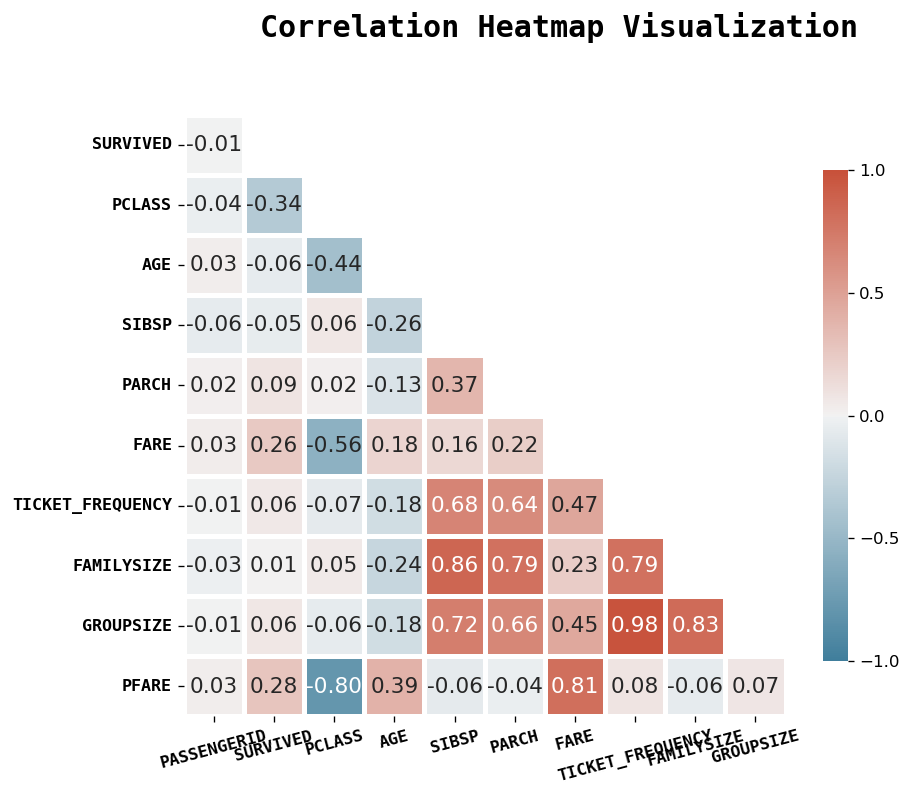

In [54]:
fig, ax = plt.subplots(figsize = (8, 7), dpi = 120)
mask = np.triu(np.ones_like(df.corr(), dtype = bool))
mask = mask[1:, :-1]
corr = df.corr().iloc[1:, :-1]
cmap = sns.diverging_palette(230, 18, as_cmap = True)
sns.heatmap(corr,
            annot = True, 
            fmt = '.2f',  
            vmin = -1, 
            vmax = 1, 
            center = 0, 
            cmap = cmap,
            linewidth = 3,
            mask = mask,
            cbar_kws = {"ticks": [-1, -0.5, 0, 0.5, 1], "shrink": .65},
            annot_kws = {'size': 13},
            square = True)
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], 
           labels = yticks, 
           fontfamily = 'monospace', 
           fontweight = 'bold', 
           rotation = 0)
plt.xticks(plt.xticks()[0], 
           labels = xticks, 
           fontfamily = 'monospace', 
           fontweight = 'bold', 
           rotation = 15)
fig.text(0.90, 0.98, 'Correlation Heatmap Visualization', 
         fontweight = 'bold', 
         fontfamily = 'monospace', 
         fontsize = 18, 
         ha = 'right')
plt.tight_layout()

Measure of association between two categorical features

In [ ]:
# Calculate Cramers V statistic for categorial-categorial association
def cramers_corrected_stat(x, y) :
    result= - 1
    if len(x.value_counts()) == 1 :
        print("First variable is constant")
    elif len(y.value_counts()) == 1 :
        print("Second variable is constant")
    else:   
        conf_matrix = pd.crosstab(x, y)

        if conf_matrix.shape[0] == 2 :
            correct = False
        else :
            correct = True

        chi2 = ss.chi2_contingency(conf_matrix, correction = correct)[0]
        n = sum(conf_matrix.sum())
        phi2 = chi2 / n
        r, k = conf_matrix.shape
        phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))    
        rcorr = r - ((r - 1) ** 2) / (n - 1)
        kcorr = k - ((k - 1) ** 2) / (n - 1)
        result = np.sqrt(phi2corr / min( (kcorr - 1), (rcorr - 1)))
    return round(result, 6)

In [ ]:
cramers_corrected_stat(df['Pclass'], df['Survived'])

In [ ]:
def get_cramer_v(x, y):
    n = len(x)
    cont_table = pd.crosstab(x, y)
    chi_2 = ss.chi2_contingency(cont_table, correction=False)[0]
    v = np.sqrt(chi_2 / (n * (np.min(cont_table.shape) - 1)))
    return v

get_cramer_v(df['Pclass'], df['Survived'])

The most common interpretation of the magnitude of the Cramer’s V is as follows :
- Small Effect Size: V ≤ 0.2
- Medium Effect Size: 0.2 < V ≤ 0.6
- Large Effect Size: 0.6 < V

In [ ]:
def Correlation_ratio(categories, values) :
    cat = np.unique(categories, return_inverse = True)[1]
    values = np.array(values)
    
    ssw = 0
    ssb = 0
    for i in np.unique(cat):
        subgroup = values[np.argwhere(cat == i).flatten()]
        ssw += np.sum((subgroup - np.mean(subgroup)) ** 2)
        ssb += len(subgroup) * (np.mean(subgroup) - np.mean(values)) ** 2

    return (ssb / (ssb + ssw)) ** .5

coef = Correlation_ratio(df['Pclass'], df['Fare'])

print(f'Eta Squared : {coef ** 2 :.4f}\nEta : {coef :.4f}')

The following rules of thumb are used to interpret values for [Eta Squared](https://www.statology.org/eta-squared/) :
- .01 ~ Small effect size
- .06 ~ Medium effect size
- .14 or higher ~ Large effect size

[Text(0, 0, 'Pclass 1')]

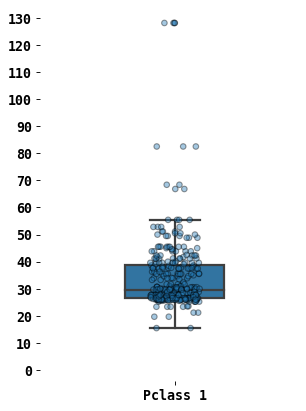

In [55]:
fig, ax = plt.subplots(1, 1, figsize = (4, 6), dpi = 80)
sns.boxplot(data = df.query('Pclass == 1'),
            y = "Pfare",         
            #dodge = True,
            width = 0.4,         # The width of the boxes
            #color = "#13ADEB", 
            linewidth = 2,       # Thickness of the box lines
            showfliers = False)  # Sop showing the fliers
sns.stripplot(data = df.query('Pclass == 1'),
              y = "Pfare",      
              hue = 'Survived',
              #dodge = True,
              #color = '#13ADEB', 
              linewidth = 1,     # Dot outline width
              edgecolor = 'black',
              alpha = 0.4)       # Makes them transparent
sns.despine(offset = 10, trim = True)
# Spines
for s in ["top","left", "right", 'bottom'] :
    ax.spines[s].set_visible(False)
ax.set_yticks(np.arange(0, 140, 10))
ax.set_yticklabels((np.arange(0, 140, 10)), fontweight = 'bold', fontfamily = 'monospace', fontsize = 12)
ax.set_ylabel('')
ax.set_xticks([0])
ax.set_xticklabels(['Pclass 1'], fontweight = 'bold', fontfamily = 'monospace', fontsize = 12)

In [ ]:
fig, ax = plt.subplots(figsize=(12,8), dpi = 80)
sns.swarmplot(y= df['Pfare'], size = 1.3, data= df.query('Pclass == 1'))
#sns.stripplot(x='Pclass', y=df['Pfare'], data=df, ax=ax[1])

In [ ]:
df.query('Pclass == 1')

In [ ]:
df[df.Pclass == 1]

In [ ]:
df['Gfare'] = df.Fare / df.GroupSize

In [ ]:
fig, ax = plt.subplots(figsize=(12,8), dpi = 80)
sns.boxplot(data = df, y = df.Pfare, x = df.Pclass)

In [ ]:
fig, ax = plt.subplots(figsize=(12,8), dpi = 80)
sns.boxplot(data = df, y = df.Gfare, x = df.Pclass)

In [ ]:
df.groupby(['Pclass', 'Embarked']).agg(Mean_Pfare = ('Pfare', 'mean'), 
                                    Median_Pfare = ('Pfare', 'median'), 
                                    Min_Pfare = ('Pfare', 'min'), 
                                    Max_Pfare = ('Pfare', 'max'))

In [ ]:
df.groupby(['Pclass', 'Embarked']).agg(Mean_Pfare = ('Gfare', 'mean'), 
                                    Median_Pfare = ('Gfare', 'median'), 
                                    Min_Pfare = ('Gfare', 'min'), 
                                    Max_Pfare = ('Gfare', 'max'))

In [ ]:
df.loc[(df.Gfare < 20) & (df.Pclass == 1)]

In [ ]:
df.loc[(df.Pfare > 15) & (df.Pclass == 2)]

In [ ]:
df[['FamilySize','Ticket_frequency']].max()

In [ ]:
df['GroupSize'] = df[['FamilySize','Ticket_frequency']].max(axis = 1)

In [ ]:
sns.countplot(x='GroupSize', hue='Survived', data=df)

In [ ]:
df['Surname'] = df['Name'].apply(lambda x: x[:x.find(',')])

In [ ]:
df['Name_frequency'] = df.groupby(['Surname'])['Surname'].transform('count')

In [ ]:
sns.countplot(data = df, x = df.Name_frequency)

In [ ]:
df[(df['Name_frequency'] == 11) & (df['FamilySize'] == 1)]